# Machine Learning Toolbox

### Course Description
Machine learning is the study and application of algorithms that learn from and make predictions on data. From search results to self-driving cars, it has manifested itself in all areas of our lives and is one of the most exciting and fast growing fields of research in the world of data science. This course teaches the big ideas in machine learning: how to build and evaluate predictive models, how to tune them for optimal performance, how to preprocess data for better results, and much more. The popular `caret` R package, which provides a consistent interface to all of R's most powerful machine learning facilities, is used throughout the course.

Example: https://www.guru99.com/r-generalized-linear-model.html (muy bueno paso a paso)


### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

**Notas sobre el paquete caret**
http://topepo.github.io/caret/model-training-and-tuning.html

**Notas sobre Confusion matrix and measures
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


### Note 3 - DataFrames

In [1]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(datasets)
library(broom)
library(caret)
library(openintro)

#Diamonds
load(file = "D:/Analista Pricing/6.0 Personal/R/DataSources/Diamonds.RData")
#Sonar
load(file = "D:/Analista Pricing/6.0 Personal/R/DataSources/Diamonds.RData")
#Wine
wine<-readRDS("D:/Analista Pricing/6.0 Personal/R/DataSources/wine_100.RDS")
#Overfit data
library(readr)
path_csv<-"https://assets.datacamp.com/production/repositories/223/datasets/0bd5f7c30d9aec3e1f1fa677a19bee3af407453a/overfit.csv"
overfit<-read_csv(path_csv)
#Breast Cancer
Cancer<-load(file = "D:/Analista Pricing/6.0 Personal/R/DataSources/BreastCancer.RData")
#Blood-brain
broodbrain<-load(file = "D:/Analista Pricing/6.0 Personal/R/DataSources/BloodBrain.RData")
#Churn
load(file = "D:/Analista Pricing/6.0 Personal/R/DataSources/Churn.RData")


Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'readr' was built under R version 3.5.3"Warning message:
"package 'broom' was built under R version 3.5.3"Warning message:
"package 'caret' was built under R version 3.5.3"Loading required package: lattice
Warning message:
"package 'openintro' was built under R version 3.5.2"Please visit openintro.org for free statistics materials

Attaching package: 'openintro'

The following object is masked from 'package:caret':

    dotPlot

The following object is masked from 'package:lattice':

    lsegments

The following object is masked from 'package:ggplot2':

    diamonds

The following objects are masked from 'package:datasets':

    cars,

## 1) Regression models: fitting them and evaluating their performance
In the first chapter of this course, you'll fit regression models with `train()` and evaluate their out-of-sample performance using cross-validation and root-mean-square error (RMSE).

### 1.1) (video) Welcome to the Toolbox
today `caret` package is one of the most widely used package in R for supervising learning (also known as predictive model), it´s when you have a target variable or something specifc that you whan to predict.

There are two main kinds of predective models:
1. Classification model (quialitative)
2. Regresion model (quiantitative) 

Once we have a model, we use a "metric" to evaluate how well the model works, a metric is quantifiable and gives us an objective measure how well the model predicts on new data.

for regresion problems  we focused on RMSE (root mean squared error) as our metric of choice, this is  the error that lineal model regresion typically seek to minimize but it´s not the best meausre beaucse it´s common practice to calculate RMSE on the same data we used to fit the model this typically leads to overly-optimistic thi called `overfitting`, a betther approach  it to use out-of-sample estimates of model performance.

#### 1.1.1)  In-sample RMSE for linear regression
RMSE is commonly calculated in-sample on your training set. What's a potential drawback (disadvantage) to calculating training set error?

    Answer = You have no idea how well your model generalizes to new data (i.e. overfitting)

#### 1.1.2) In-sample RMSE for linear regression on diamonds
As you saw in the video, included in the course is the `diamonds` dataset, which is a classic dataset from the `ggplot2` package. The dataset contains physical attributes of diamonds as well as the price they sold for. One interesting modeling challenge is predicting diamond price based on their attributes using something like a linear regression.

Recall that to fit a linear regression, you use the `lm()` function in the following format:

    mod <- lm(y ~ x, my_data)
    
To make predictions using mod on the original data, you call the predict() function:

    pred <- predict(mod, my_data)

**Exercise**
1. Fit a linear model on the diamonds dataset predicting price using all other variables as predictors (i.e. price ~ .). Save the result to model.
2. Make predictions using model on the full original dataset and save the result to p.
3. Compute errors using the formula errors=predicted−actual. Save the result to error.
4. Compute RMSE using the formula you learned in the video and print it to the console.

*Answer*

In [2]:
data(diamonds)
head(diamonds)

# Fit lm model: model
model <- lm(price ~ ., diamonds)

# Predict on full data: p
p <- predict(model, diamonds)
summary(p)

# Compute errors: error
error <- p - diamonds[["price"]]

# Calculate RMSE
sqrt(mean(error ^ 2))

#Or can use the function Residual
#sqrt(mean(residuals(model) ^ 2))

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -4308    1073    2819    3933    5886   39394 

[1] 1129.843

### 1.2) (video) Out-of-sample error measures

This course focused on predictive, rather than explanatory modeling, we want model that not overfit the training data and generalize well, our primary concern is "do the models perform well on new data?" so the best way to do that is test the models on new data.

This simulates real worl experience, in which you fit on one dataset and then predict new data,where you do not actually know the outcome, simulating this experience with a train/test split helps you make an honest assessment fo yourself as a modeler this is one of the key insighs of machine learning: error metrics should be computed on new data because in-sample validatition (or predicting on your data) essentialy guarantees overfiting , out-of-sample validation helps you choose models that will continue perform well in the future.

it´s the primary goal of the `caret` package in general and this course specifically: don´t overfit 

**Example**

In [3]:
#lest walk throught a simple example of out-of-sample validation
data(mtcars)
head(mtcars,)

#Fit a model to the mtcars data
#we create our model on 20 register from our dataset
model<-lm(mpg ~ hp, mtcars[1:20,])

#Predict out-of-sample
#now we make predictions on a New dataset: last 12 observations
predicted<-predict(model, mtcars[21:32,], type = "response")


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In practice, rather than manually splitting the dataset, we´d actually use the `createResamples` or `createFolds` in `caret`, but the manual split simplifies this example.

In [4]:
#Evaluate error
#finally we calculate RMSE on the test set by comparing the predictions from our model to the actual mpg value for the test set
actual<-mtcars[21:32,"mpg"]
print("RMSE on the test set")
sqrt(mean((predicted-actual)^2))

#RMSE is a measure of the model´s average error and it has the same units as the test set, so this means
#our model is off by 5 to 6 miles per gallon, on average 

#Compare to in-sample RMSE

#fit a model to the full dataset
model2<-lm(mpg ~ hp, mtcars)

#Predict in-sample
predicted2<-predict(model2, mtcars, type = "response")

#Evaluate error
print("RMSE full dataset")
actual2<-mtcars[,"mpg"]
sqrt(mean((predicted2-actual2)^2))

[1] "RMSE on the test set"


[1] 5.507236

[1] "RMSE full dataset"


[1] 3.740297

compared to in-sample RMSE from a model fit on the full dataset, our model is significantly worse if we used in-sample error, we would fooled ourselves into thinking our models is much better that it actually is in reality.

#### 1.2.1) Out-of-sample RMSE for linear regression
What is the advantage of using a train/test split rather than just validating your model in-sample on the training set? Because It gives you an estimate of how well your model performs on new data, the Tests sets are essential for making sure your models will make good predictions

#### 1.1.2) Randomly order the data frame
One way you can take a train/test split of a dataset is to order the dataset randomly, then divide it into the two sets. This ensures that the training set and test set are both random samples and that any biases in the ordering of the dataset (e.g. if it had originally been ordered by price or size) are not retained in the samples we take for training and testing your models. You can think of this like shuffling a brand new deck of playing cards before dealing hands.

First, you set a random seed so that your work is reproducible and you get the same random split each time you run your script:

    set.seed(42)

Next, you use the `sample()` function to shuffle the row indices of the `diamonds` dataset. You can later use these indices to reorder the dataset.

    rows <- sample(nrow(diamonds))

Finally, you can use this random vector to reorder the diamonds dataset:

    diamonds <- diamonds[rows, ]
    
**Exercise**
1. Set the random seed to 42.
2. Make a vector of row indices called rows.
3. Randomly reorder the diamonds data frame, assigning to shuffled_diamonds.

*Answer*

In [5]:
#Note the data ser "diamonds" is avalibre in library ggplot2
# Set seed
set.seed(42)

# Shuffle row indices: rows
rows<-sample(nrow(diamonds))

# Randomly order data
shuffled_diamonds <- diamonds[rows, ]

**Note: Randomly ordering your dataset is important for many machine learning methods**

#### 1.2.3) Try an 80/20 split
Now that your dataset is randomly ordered, you can split the first 80% of it into a training set, and the last 20% into a test set. You can do this by choosing a split point approximately 80% of the way through your data:

    split <- round(nrow(mydata) * .80)
    
You can then use this point to break off the first 80% of the dataset as a training set:

    mydata[1:split, ]

And then you can use that same point to determine the test set:

    mydata[(split + 1):nrow(mydata), ]
    
**Exercise**
1. Choose a row index to split on so that the split point is approximately 80% of the way through the diamonds dataset. Call this index split.
2. Create a training set called train using that index.
3. Create a test set called test using that index.

*Answer*    

In [6]:
#Note we´re using our data set randomly ordering called "shuffled_diamonds" and not "diamonds" dataset the correct answear 

# Determine row to split on: split
split<- round(nrow(shuffled_diamonds)*.80)

# Create train
train<- shuffled_diamonds[1:split,]

# Create test
test<-shuffled_diamonds[(split + 1):nrow(shuffled_diamonds),]

#### 1.2.4) Predict on test set
Now that you have a randomly split `training set` and `test set`, you can use the `lm()` function as you did in the first exercise to fit a model to your training set, rather than the entire dataset. Recall that you can use the formula interface to the linear regression function *to fit a model with a specified target variable using all other variables in the dataset* as predictors:

    mod <- lm(y ~ ., training_data)
    
You can use the `predict()` function to make predictions from that model on new data. The new dataset must have all of the columns from the training data, but they can be in a different order with different values. Here, rather than re-predicting on the training set, you can predict on the test set, which you did not use for training the model. This will allow you to determine the out-of-sample error for the model in the next exercise:

    p <- predict(model, new_data)    

**Exercise**
1. Fit an lm() model called model to predict price using all other variables as covariates. Be sure to use the training set, train.
2. Predict on the test set, test, using predict(). Store these values in a vector called p.

*Answer*

In [7]:
# Fit lm model on train: model
model<-lm(price ~ ., train)

# Predict on test: p
p<-predict(model, test)

#### 1.2.4) Calculate test set RMSE by hand
Now that you have predictions on the test set, you can use these predictions to calculate an error metric (in this case RMSE) on the test set and see how the model performs out-of-sample, rather than in-sample as you did in the first exercise. You first do this by calculating the errors between the predicted diamond prices and the actual diamond prices by subtracting the predictions from the actual values.

Once you have an error vector, calculating RMSE is as simple as squaring it, taking the mean, then taking the square root:

    sqrt(mean(error^2))

**Exercise**
`test`, `model`, and `p` are loaded in your workspace.

1. Calculate the error between the predictions on the test set and the actual diamond prices in the test set. Call this error.
2. Calculate RMSE using this error vector, just printing the result to the console.

*Answer*

In [8]:
# Compute errors: error
error<-p-test$price

# Calculate RMSE
sqrt(mean(error^2))

[1] 1136.596

#### 1.2.5) Comparing out-of-sample RMSE to in-sample RMSE
Why is the test set RMSE higher than the training set RMSE?
Because you overfit the training set and the test set contains data the model hasn't seen before, Computing the error on the training set is risky because the model may overfit the data used to train it.

here we can se the RMSE of train set:

In [9]:
# Compute errors: error
error_train<-predict(model, train) - train$price

# Calculate RMSE of train set
sqrt(mean(error_train^2))

[1] 1128.251

### 1.3) (video) Cross-validation

in the last chapter we saw how can divided our Full Dataset in two sub dataset (training set and test set) and evaluated out-of sample error once, however this process it´s a little  fragile: because the presence or absence of a sigle outliers can vastly change our out-of-sample RMSE, so a better approach than a simple train/test split is using multiple test sets and averaging out-of-sample error, which gives us a more precise estimate of true out-of-sample error, one of the most common approaches for multiple test sets is know as `cross-validation` in wich we split our data into ten `folders` or traint/test splits, we create these folds in such a way that each point in our dataset ocurrs in exactly one test set.

    Full DataSet >>> Fold 1
                     Fold 2
                     .
                     .
                     Fold N

We assign each row to its single test set randomly , to avoid any kind of systematic biases in our data this one of the best way to estimate out-of-sample error for predictive models. 

One important note: after doing cross-validation, you throw all resampled models away and star over! so cross-validation is only used to estimate the out-of-sample error for you model once you know this, you re-fit your model on the full training dataset, so as to fully exploit the information in that dataset, all this make the model very expensive: it inherently takes 11 times as long as fitting a single model (11 cross-validation models plus the final model).

The `train` function in `caret ` does a different kind of re-sampling known as boostrap validationt but it also capable of doing cross-validation, and the two methods in practice yield similar results, now we´ll see a example with mtcars dataset.


In [10]:
#first we set random seed
set.seed(42)

#fit linear regresion model
model<- train(
  mpg ~ hp, 
  mtcars, 
  method = "lm",
  trControl = trainControl(   #Controls the parameter caret uses for cross-validation
    method = "cv",
    number = 10,
    verboseIter = TRUE # progress log as the model is being fit 
  )
)

model

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

32 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 30, 29, 29, 28, 29, 28, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  3.957996  0.9252153  3.349958

Tuning parameter 'intercept' was held constant at a value of TRUE

#### 1.3.1) Advantage of cross-validation
What is the advantage of cross-validation over a single train/test split?
It gives you multiple estimates of out-of-sample error, rather than a single estimate, if all of your estimates give similar outputs, you can be more certain of the model's accuracy. If your estimates give different outputs, that tells you the model does not perform consistently and suggests a problem with it

#### 1.3.2 ) 10-fold cross-validation
As you saw in the video, a better approach to validating models is to use multiple systematic test sets, rather than a single random train/test split. Fortunately, the `caret` package makes this very easy to do:

    model <- train(y ~ ., my_data)
    
`caret` supports many types of cross-validation, and you can specify which type of cross-validation and the number of cross-validation folds with the `trainControl()` function, which you pass to the `trControl` argument in `train()`:

    model <- train(
      y ~ ., 
      my_data,
      method = "lm",
      trControl = trainControl(
        method = "cv", 
        number = 10,
        verboseIter = TRUE
      )
    )
 
 
It's important to note that you pass the method for modeling to the main `train()` function and the method for cross-validation to the `trainControl()` function.    

**Exercise**
1. Fit a linear regression to model price using all other variables in the diamonds dataset as predictors. Use the train() function and 10-fold cross-validation. (Note that we've taken a subset of the full diamonds dataset to speed up this operation, but it's still named diamonds.)
2. Print the model to the console and examine the results.

*Answer*

In [11]:
# Fit lm model using 10-fold CV: model
model <- train(
  price ~ ., 
  diamonds,
  method = "lm",
  trControl = trainControl(
    method = "cv", 
    number = 10,
    verboseIter = TRUE
  )
)

# Print model to console
model

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

53940 samples
    9 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 48546, 48546, 48545, 48547, 48547, 48546, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1130.929  0.9196497  740.5019

Tuning parameter 'intercept' was held constant at a value of TRUE

#### 1.3.3) 5-fold cross-validation
In this course, you will use a wide variety of datasets to explore the full flexibility of the `caret package`. Here, you will use the famous Boston housing dataset, where the goal is to predict median home values in various Boston suburbs.

You can use exactly the same code as in the previous exercise, but change the dataset used by the model:

    model <- train(
      medv ~ ., 
      Boston, # <- new!
      method = "lm",
      trControl = trainControl(
        method = "cv", 
        number = 10,
        verboseIter = TRUE
      )
    )

Next, you can reduce the number of cross-validation folds from 10 to 5 using the `number` argument to the `trainControl()` argument:

    trControl = trainControl(
      method = "cv", 
      number = 5,
      verboseIter = TRUE
    )

**Exercise**
1. Fit an `lm()` model to the `Boston` housing dataset, such that `medv` is the response variable and all other variables are explanatory variables.
2. Use 5-fold cross-validation rather than 10-fold cross-validation.
3. Print the model to the console and inspect the results.

*Answer*


In [12]:
#Data Boston
library(MASS)


# Fit lm model using 5-fold CV: model
model <- train(
  medv ~ ., 
  Boston,
  method = "lm",
  trControl = trainControl(
    method = "cv", #Cross validation 
    number = 5,
    verboseIter = TRUE
  )
)

# Print model to console
model


Attaching package: 'MASS'

The following objects are masked from 'package:openintro':

    housing, mammals

The following object is masked from 'package:dplyr':

    select



+ Fold1: intercept=TRUE 
- Fold1: intercept=TRUE 
+ Fold2: intercept=TRUE 
- Fold2: intercept=TRUE 
+ Fold3: intercept=TRUE 
- Fold3: intercept=TRUE 
+ Fold4: intercept=TRUE 
- Fold4: intercept=TRUE 
+ Fold5: intercept=TRUE 
- Fold5: intercept=TRUE 
Aggregating results
Fitting final model on full training set


Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 404, 405, 405, 405, 405 
Resampling results:

  RMSE      Rsquared   MAE     
  4.816486  0.7249456  3.404306

Tuning parameter 'intercept' was held constant at a value of TRUE

#### 1.3.3) 5 x 5-fold cross-validation
You **can do more than just one iteration of cross-validation**. Repeated cross-validation gives you a better estimate of the test-set error. You can also repeat the entire cross-validation procedure. This takes longer, but gives you many more out-of-sample datasets to look at and much more precise assessments of how well the model performs.

One of the awesome things about the `train()` function in `caret` is how easy it is to run very different models or methods of cross-validation just by tweaking a few simple arguments to the function call. For example, you could repeat your entire cross-validation procedure 5 times for greater confidence in your estimates of the model's out-of-sample accuracy, e.g.:

    trControl = trainControl(
      method = "repeatedcv", #define the repetead
      number = 5,
      repeats = 5,  #We can repetead cross-validation
      verboseIter = TRUE
    )

Suppose that method = "repeatedcv", number = 10 and repeats = 3,then **three** separate 10-fold cross-validations are used as the resampling scheme.

**Exercise**
1. Re-fit the linear regression model to the Boston housing dataset.
2. Use 5 repeats of 5-fold cross-validation.
3. Print the model to the console.

*Answer*

In [13]:
# medv median value of owner-occupied homes in \$1000s
model <- train(
  medv ~ ., 
  Boston,
  method = "lm",
  trControl = trainControl(
    method = "repeatedcv", 
    number = 5,
    repeats = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
model

+ Fold1.Rep1: intercept=TRUE 
- Fold1.Rep1: intercept=TRUE 
+ Fold2.Rep1: intercept=TRUE 
- Fold2.Rep1: intercept=TRUE 
+ Fold3.Rep1: intercept=TRUE 
- Fold3.Rep1: intercept=TRUE 
+ Fold4.Rep1: intercept=TRUE 
- Fold4.Rep1: intercept=TRUE 
+ Fold5.Rep1: intercept=TRUE 
- Fold5.Rep1: intercept=TRUE 
+ Fold1.Rep2: intercept=TRUE 
- Fold1.Rep2: intercept=TRUE 
+ Fold2.Rep2: intercept=TRUE 
- Fold2.Rep2: intercept=TRUE 
+ Fold3.Rep2: intercept=TRUE 
- Fold3.Rep2: intercept=TRUE 
+ Fold4.Rep2: intercept=TRUE 
- Fold4.Rep2: intercept=TRUE 
+ Fold5.Rep2: intercept=TRUE 
- Fold5.Rep2: intercept=TRUE 
+ Fold1.Rep3: intercept=TRUE 
- Fold1.Rep3: intercept=TRUE 
+ Fold2.Rep3: intercept=TRUE 
- Fold2.Rep3: intercept=TRUE 
+ Fold3.Rep3: intercept=TRUE 
- Fold3.Rep3: intercept=TRUE 
+ Fold4.Rep3: intercept=TRUE 
- Fold4.Rep3: intercept=TRUE 
+ Fold5.Rep3: intercept=TRUE 
- Fold5.Rep3: intercept=TRUE 
+ Fold1.Rep4: intercept=TRUE 
- Fold1.Rep4: intercept=TRUE 
+ Fold2.Rep4: intercept=TRUE 
- Fold2.Re

Linear Regression 

506 samples
 13 predictor

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 404, 405, 405, 405, 405, 404, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  4.837325  0.7267669  3.398271

Tuning parameter 'intercept' was held constant at a value of TRUE

#### 1.3.4) Making predictions on new data
Finally, the model you fit with the `train()` function has the exact same `predict()` interface as the linear regression models you fit earlier in this chapter.

After fitting a model with `train()`, you can simply call `predict()` with new data, e.g:

    predict(my_model, new_data)

**Exercise**
Use the predict() function to make predictions with model on the full Boston housing dataset. Print the result to the console.

*Answer*

In [14]:
result<-predict(model, Boston)

## 2) Classification models: fitting them and evaluating their performance

In this chapter, you'll fit classification models with `train()` and evaluate their out-of-sample performance using cross-validation and area under the curve (AUC).

### 2.1) (video) Logistic regression on sonar

in classification models you're trying to predict a categorical target, for example predicting whether or not will a loan default? this is still a form of supervised learning, like with regression problems, as before,  we can use a train/test split to explore how well our model generalizes to new data, in this chapter we will been working with the `sonar` dataset, a classic statistics dataset whic contains some characteristics of a sonar signal for objects that are either rocks or mines the goal here is to train a classifier that can relibly distinguish rocks from mines.

So let´s load the Sonar dataset and take a look at it.

In [15]:
library(mlbench) #Machine Learning Benchmark Problem
data(Sonar)
Sonar[1:6,c(1:5,61)]


Warning message:
"package 'mlbench' was built under R version 3.5.3"

V1,V2,V3,V4,V5,Class
0.0200,0.0371,0.0428,0.0207,0.0954,R
0.0453,0.0523,0.0843,0.0689,0.1183,R
0.0262,0.0582,0.1099,0.1083,0.0974,R
0.0100,0.0171,0.0623,0.0205,0.0205,R
0.0762,0.0666,0.0481,0.0394,0.0590,R
0.0286,0.0453,0.0277,0.0174,0.0384,R


Note that the target is either "R" for rock and "M" for mine and most of predictors are numbers measuring some aspect of a Sonar signal.

#### 2.1.2) Try a 60/40 split
As you saw in the video, you'll be working with the `Sonar` dataset in this chapter, using a 60% training set and a 40% test set. We'll practice making a train/test split one more time, just to be sure you have the hang of it. Recall that you can use the `sample()` function to get a random permutation of the row indices in a dataset, to use when making train/test splits, e.g.:

    n_obs <- nrow(my_data)
    permuted_rows <- sample(n_obs)

And then use those row indices to randomly reorder the dataset, e.g.:

    my_data <- my_data[permuted_rows, ]

Once your dataset is randomly ordered, you can split off the first 60% as a training set and the last 40% as a test set.

**Exercise**
1. Get the number of observations (rows) in Sonar, assigning to n_obs.
2. Shuffle the row indices of Sonar and store the result in permuted_rows.
3. Use permuted_rows to randomly reorder the rows of Sonar, saving as Sonar_shuffled.
4. Identify the proper row to split on for a 60/40 split. Store this row number as split.
5. Save the first 60% of Sonar_shuffled as a training set.
6. Save the last 40% of Sonar_shuffled as the test set.

*Answer*

In [16]:
# Get the number of observations
n_obs<-nrow(Sonar)

# Shuffle row indices: permuted_rows
permuted_rows<-sample(n_obs)

# Randomly order data: Sonar
Sonar_shuffled<-Sonar[permuted_rows,]

# Identify row to split on: split
split <- round(n_obs * .60)

# Create train
train<-Sonar_shuffled[1:split,]

# Create test
test<-Sonar_shuffled[(split+1):nrow(Sonar_shuffled),]

#### 2.1.3) Fit a logistic regression model
Once you have your random training and test sets you can fit a logistic regression model to your training set using the `glm()` function. `glm(`) is a more advanced version of `lm()` that allows for more varied types of regression models, aside from plain vanilla ordinary least squares regression.

Be sure to pass the argument `family = "binomial"` to `glm()` to specify that you want to do logistic (rather than linear) regression. For example:

    glm(Target ~ ., family = "binomial", dataset)
    
Don't worry about warnings like `glm.fit: algorithm did not converge` or `glm.fit: fitted probabilities numerically 0 or 1 occurred`. These are common on smaller datasets and usually don't cause any issues. They typically mean your dataset is perfectly separable, which can cause problems for the math behind the model, but R's `glm()` function is almost always robust enough to handle this case with no problems.

Once you have a `glm()` model fit to your dataset, you can predict the outcome (e.g. rock or mine) on the `test` set using the `predict()` function with the argument `type = "response"`:

    predict(my_model, test, type = "response")  

**Exercise**

1. Fit a logistic regression called model to predict Class using all other variables as predictors. Use the training set for Sonar.
2. Predict on the test set using that model. Call the result p like you've done before.    

*Answer*

In [17]:
# Fit glm model: model
model<-glm(Class ~ .,family = "binomial", data = train)

# Predict on test: p
p<-predict(model, test, type = "response")

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

### 2.2 (video) Confusion Matrix 

A really useful tool for evaluating binary classification models is known as a "confusion matrix" this is a matrix of the model´s predicted classes vs the actual outcomes in reality , it´s called confusion matrix because it reveals how "confused" the model is between 2 classes. 

The columns are the true classes while the rows of matrix are the predicted classes, the main diagonal of the matrix is where the model is correct 

| Prediction/Reference | Yes (Positive) | No (Negative)  |
|----------------------|----------------|----------------|
| Yes  (Positive)      | True Positive  | False Positive |
| No   (Negative)      | False Negative | True Negative  |

To generate a confusion matrix, we start by fitting a model to our training set, next we predict on the test set, and cut the predicted probabilities with a threshold to get assignments, in other words de logistic regresion model outputs the probability that an object is a mine, but we need to use these probabilities to make a binary decision: rock or mine in the simple case, we use a probability of 50% as our cutoff and assign anything under 50% as a rock otherwise is a mine, next we make a 2-way frequency table using a `table` function in R and we´ll use the `confusionMatrix` function in `caret` package to calculate our error rate.

**Example**

In [18]:
#1) Fit Model
model<-glm(Class ~ ., family = binomial(link = "logit"), train )
p<- predict(model, test, type = "response")
summary(p)

#2 Turn probabilities into classes and look at their frequencies 
p_class<- ifelse(p>.5,"M","R")
table(p_class)

#3 Make a 2-way frequency table
table(p_class,test[["Class"]])


p_class<-as.factor(p_class)


#use caret´s helper function to calculate additional statistics
confusionMatrix(p_class, test[["Class"]])

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000001 0.3711606 0.9998758 1.0000000 

p_class
 M  R 
32 51 

       
p_class  M  R
      M 11 21
      R 30 21

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 11 21
         R 30 21
                                          
               Accuracy : 0.3855          
                 95% CI : (0.2807, 0.4988)
    No Information Rate : 0.506           
    P-Value [Acc > NIR] : 0.9897          
                                          
                  Kappa : -0.2323         
                                          
 Mcnemar's Test P-Value : 0.2626          
                                          
            Sensitivity : 0.2683          
            Specificity : 0.5000          
         Pos Pred Value : 0.3438          
         Neg Pred Value : 0.4118          
             Prevalence : 0.4940          
         Detection Rate : 0.1325          
   Detection Prevalence : 0.3855          
      Balanced Accuracy : 0.3841          
                                          
       'Positive' Class : M               
                                    

#### 2.2.1) Calculate a confusion matrix
As you saw in the video, a confusion matrix is a very useful tool for calibrating the output of a model and examining all possible outcomes of your predictions (true positive, true negative, false positive, false negative).

Before you make your confusion matrix, you need to "cut" your predicted probabilities at a given threshold to turn probabilities into a factor of class predictions. Combine `ifelse()` with `factor()` as follows:

    pos_or_neg <- ifelse(probability_prediction > threshold, positive_class, negative_class)
    p_class <- factor(pos_or_neg, levels = levels(test_values))
    
`confusionMatrix()` in `caret` improves on `table()` from base R by adding lots of useful ancillary statistics in addition to the base rates in the table. You can calculate the confusion matrix (and the associated statistics) using the predicted outcomes as well as the actual outcomes, e.g.:    

    confusionMatrix(p_class, test_values)


**Exercise**
1. Use ifelse() to create a character vector, m_or_r that is the positive class, "M", when p is greater than 0.5, and the negative class, "R", otherwise.
2. Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
3. Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from the test dataset.

*Answer*

In [19]:
#1) Fit Model
# Fit glm model: model
model<-glm(Class ~ .,family = "binomial", data = train)
# Predict on test: p
p<-predict(model, test, type = "response")

# If p exceeds threshold of 0.5, M else R: m_or_r
m_or_r<-ifelse(p > .5,"M","R")

# Convert to factor: p_class
p_class<-factor(m_or_r, levels = levels(test$Class))

# Create confusion matrix
confusionMatrix(p_class,test$Class)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 11 21
         R 30 21
                                          
               Accuracy : 0.3855          
                 95% CI : (0.2807, 0.4988)
    No Information Rate : 0.506           
    P-Value [Acc > NIR] : 0.9897          
                                          
                  Kappa : -0.2323         
                                          
 Mcnemar's Test P-Value : 0.2626          
                                          
            Sensitivity : 0.2683          
            Specificity : 0.5000          
         Pos Pred Value : 0.3438          
         Neg Pred Value : 0.4118          
             Prevalence : 0.4940          
         Detection Rate : 0.1325          
   Detection Prevalence : 0.3855          
      Balanced Accuracy : 0.3841          
                                          
       'Positive' Class : M               
                                    

Here it´s importante to see:

The `accuracy` of this model that tell us how well this model predict, What is the test set true positive rate (or `sensitivity` or Recall or true positive rate) of this model and What is the test set true negative rate (or `specificity`) of this model.

Link1: https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102 (Understanding Logistic Regression)
Lin2: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 (Understanding Confusion Matrix)


| Prediction/Reference | Yes (Positive) | No (Negative)  |
|----------------------|----------------|----------------|
| Yes  (Positive)      | True Positive  | False Positive |
| No   (Negative)      | False Negative | True Negative  |

where 

1. **Accuracy** = `TP+TN/Total`  (Out of all the classes, how much we predicted correctly)
2. Precision (Positive predictive value) = `TP / TP + FP`  (Out of all the positive classes we have predicted correctly, how many are actually positive)
3. **Sensitivity** (Recall or True positive rate) = `TP/ TP + FN` or `TP/Positive (P)` (Out of all the positive classes, how much we predicted correctly. It should be high as possible.)
4. Specificity (True negative rate) = `TN/ TN + FP` or `TN/Negative (N)`

and F-measure = `2*Recall*Precision / Recall + Precision`


### 2.3)  (video) Class probabilities and predictions
in the previous exercise we worked through an example confusion matrix using 50% as classification cutoff threshold, however we´re not limited to using this threshold we can use 10% or 90 % but choosing a threshold is an exercise in balancing the true positive rate (or percent of mines we catch) with false positive rate (or percen of non-mines we incorrectly flag as mines) but unfortunately there is not a metodology to choose one, you usually have to use a confusion matrix on your test set to find a good threshold.

#### 2.3.1) Probabilities and classes
What's the relationship between the predicted probabilities and the predicted classes?
Predicted classes are based off of predicted probabilities plus a classification threshol

#### 2.3.2) Try another threshold
In the previous exercises, you used a threshold of 0.50 to cut your predicted probabilities to make class predictions (rock vs mine). However, this classification threshold does not always align with the goals for a given modeling problem.

For example, pretend you want to identify the objects you are really certain are mines. In this case, you might want to use a probability threshold of 0.90 to get fewer predicted mines, but with greater confidence in each prediction.

The code pattern for cutting probabilities into predicted classes, then calculating a confusion matrix, was shown in Exercise 7 of this chapter.

**Exercise**
1. Use `ifelse()` to create a character vector, `m_or_r` that is the positive class, `"M"`, when p is greater than 0.9, and the negative class, `"R"`, otherwise.
2. Convert `m_or_r` to be a factor, `p_class`, with levels the same as those of `test[["Class"]]`.
3. Make a confusion matrix with `confusionMatrix()`, passing `p_class` and the `"Class"` column from the test dataset.

*Answer*

In [20]:
# If p exceeds threshold of 0.9, M else R: m_or_r
m_or_r<-ifelse(p>.9,"M","R")

# Convert to factor: p_class
p_class<-factor(m_or_r, levels = levels(Sonar$Class))

# Create confusion matrix
confusionMatrix(p_class, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M  8 21
         R 33 21
                                         
               Accuracy : 0.3494         
                 95% CI : (0.248, 0.4619)
    No Information Rate : 0.506          
    P-Value [Acc > NIR] : 0.9986         
                                         
                  Kappa : -0.3059        
                                         
 Mcnemar's Test P-Value : 0.1344         
                                         
            Sensitivity : 0.19512        
            Specificity : 0.50000        
         Pos Pred Value : 0.27586        
         Neg Pred Value : 0.38889        
             Prevalence : 0.49398        
         Detection Rate : 0.09639        
   Detection Prevalence : 0.34940        
      Balanced Accuracy : 0.34756        
                                         
       'Positive' Class : M              
                                         

#### 2.3.3) From probabilites to confusion matrix
Conversely, say you want to be really certain that your model correctly identifies all the mines as mines. In this case, you might use a prediction threshold of 0.10, instead of 0.90.

The code pattern for cutting probabilities into predicted classes, then calculating a confusion matrix, was shown in Exercise 7 of this chapter.

**Exercise**
1. Use ifelse() to create a character vector, m_or_r that is the positive class, "M", when p is greater than 0.1, and the negative class, "R", otherwise.
2. Convert m_or_r to be a factor, p_class, with levels the same as those of test[["Class"]].
3. Make a confusion matrix with confusionMatrix(), passing p_class and the "Class" column from the test dataset.

*Answer*

In [21]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

# If p exceeds threshold of 0.1, M else R: m_or_r
m_or_r<- ifelse(p>.1,"M","R")

# Convert to factor: p_class
p_class<-factor(m_or_r, levels = levels(test$Class))

# Create confusion matrix
confusionMatrix(p_class, test$Class)

Confusion Matrix and Statistics

          Reference
Prediction  M  R
         M 11 21
         R 30 21
                                          
               Accuracy : 0.3855          
                 95% CI : (0.2807, 0.4988)
    No Information Rate : 0.506           
    P-Value [Acc > NIR] : 0.9897          
                                          
                  Kappa : -0.2323         
                                          
 Mcnemar's Test P-Value : 0.2626          
                                          
            Sensitivity : 0.2683          
            Specificity : 0.5000          
         Pos Pred Value : 0.3438          
         Neg Pred Value : 0.4118          
             Prevalence : 0.4940          
         Detection Rate : 0.1325          
   Detection Prevalence : 0.3855          
      Balanced Accuracy : 0.3841          
                                          
       'Positive' Class : M               
                                    

### 2.4) (video) Introducing the ROC curve

link: https://www.youtube.com/watch?v=4jRBRDbJemM (Youtube/ ROC and AUC, Clearly Explained!)

Manually evaluating classification thresholds is hard work! in order to do this correctly, we´d have to manually dozens or hundreds of confusion matrices, and then visually inspect them unitil we find one we like, this seem un-scientific, as it requiries a lot manually work is heuristic-based  and could easly overlook a particular important threshold we need a systematic approach to evaluating classification threslholds. 

One common approach to do this problem is to let the computer iteratively evaluate every possible classification threshold and then calculate the true-positive rate and false-positive rate for each of them, we can then plot the true positive/false positive rate at every possible threshold and visualize the trade-off between the 2 extreme models (predict all mines vs predicts all rocks) or 100% true positive rate vs 0 % false positive rate the resulting curve is called a ROC curve or Receiver Operating Characteristic curve e.g

Note: in the graph the X axis is the false positive rate, the Y axis is the true positive rate 

**Remember**

| Prediction/Reference | Yes (Positive) | No (Negative)  |
|----------------------|----------------|----------------|
| Yes  (Positive)      | True Positive  | False Positive |
| No   (Negative)      | False Negative | True Negative  |

1. **Accuracy** = `TP+TN/Total`  (Out of all the classes, how much we predicted correctly)
2. Precision (Positive predictive value) = `TP / TP + FP`  (Out of all the positive classes we have predicted correctly, how many are actually positive)
3. **Sensitivity** (Recall or True Positive Rate or "TPR" ) = `TP/ TP + FN` or `TP/Positive (P)` (Out of all the positive classes, how much we predicted correctly. It should be high as possible.)
4. **Specificity** (True Negative Rate) = `TN/ TN + FP` or `TN/Negative (N)`

Warning message:
"package 'caTools' was built under R version 3.5.3"

M vs. R,0.6567944


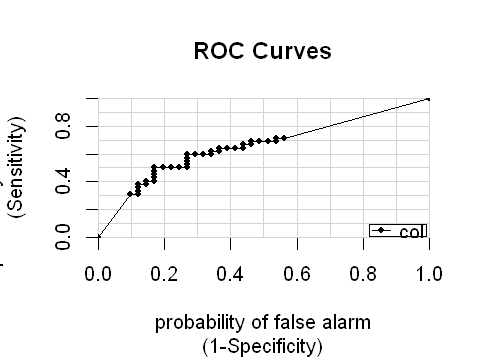

In [22]:
#Create a ROC curve
library(caTools)
colAUC(p, test$Class, plotROC = TRUE)

#Note False Negative Rate = 1-Specificity

#### 2.4.1) Plot an ROC curve
As you saw in the video, an ROC curve is a really useful shortcut for summarizing the performance of a classifier over all possible thresholds. This saves you a lot of tedious work computing class predictions for many different thresholds and examining the confusion matrix for each.

My favorite package for computing ROC curves is `caTools`, which contains a function called `colAUC()`. This function is very user-friendly and can actually calculate ROC curves for multiple predictors at once. In this case, you only need to calculate the ROC curve for one predictor, e.g.

    colAUC(predicted_probabilities, actual, plotROC = TRUE)

The function will return a score called AUC (more on that later) and the `plotROC = TRUE` argument will return the plot of the ROC curve for visual inspection.

**Exercise**
`model`, `test`, and `train` from the last exercise using the sonar data are loaded in your workspace.

1. Predict probabilities (i.e. type = "response") on the test set, then store the result as p.
2. Make an ROC curve using the predicted test set probabilities.

*Answer*

M vs. R,0.6567944


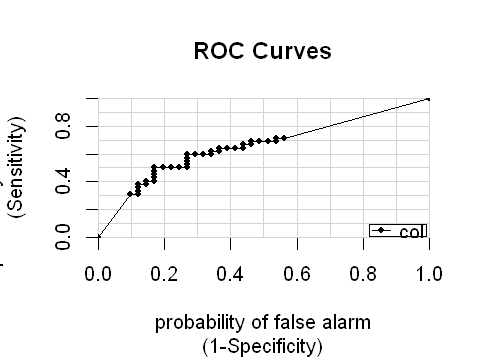

In [23]:
# Predict on test: p
p<-predict(model, test, type = "response")

# Make ROC curve
colAUC(p, test$Class, plotROC = TRUE)

### 2.5 (video) Area under the curve (AUC)

Just looking at a ROC curves starts to give us a good idea of how to evaluate whether or not our predict model is any good one interesting observation is that models with random predictions tend to produce curves that closely follow the diagonal line. On the other hand, models with a classification threshold that allows for perfect separation of classes produce a "box" with a single point at (1,0) to represent a model where it is possible to archive a 100% true positive rate and 0% false positive rate, wouldn´t that be nice? continuing with this example, if we calculate the area under each of these 2 ROC curves, an interesting property emerges: the area under the curve for a perfect model is exactly 1, as our plot represents a 1 by 1square, and the average area under the curve for a random model is point-5 as our plot represents a diagonal line. We can use this insight to formalize a measure of model accurancy know as "AUC" OR "Area Under the Curve".

1. Single-number summary of model accuracy 
2. summarizes performance across all threshold 
3. Rank different models within the same dataset.

It ranges from 0 to 1, where point-5 is the UAC of a random model and 1-point-0 is the UAC of a perfect model and 0 model always wrong , as a very rough rule of thumb, UAC can be thought of as letter grade , where point-9 is an "A", point-8 is an "B" and so on. I´m generally happy with a model that has an UAC of point-8 or higher, and models in the point-7 range are often useful.

#### 2.5.1 ) Customizing trainControl
As you saw in the video, area under the ROC curve is a very useful, single-number summary of a model's ability to discriminate the positive from the negative class (e.g. mines from rocks). An AUC of 0.5 is no better than random guessing, an AUC of 1.0 is a perfectly predictive model, and an AUC of 0.0 is perfectly anti-predictive (which rarely happens).

This is often a much more useful metric than simply ranking models by their accuracy at a set threshold, as different models might require different calibration steps (looking at a confusion matrix at each step) to find the optimal classification threshold for that model.

You can use the `trainControl()` function in `caret` to use AUC (instead of acccuracy), to tune the parameters of your models. The `twoClassSummary()` convenience function allows you to do this easily.

When using `twoClassSummary()`, be sure to always include the argument `classProbs = TRUE` or your model will throw an error! (You cannot calculate AUC with just class predictions. You need to have class probabilities as well.)

**Exercise**
1. Customize the trainControl object to use twoClassSummary rather than defaultSummary.
2. Use 10-fold cross-validation.
3. Be sure to tell trainControl() to return class probabilities.

*Answer*

In [24]:
# Create trainControl object: myControl
myControl <- trainControl(
  method = "cv", #cross validation 
  number = 10,
  summaryFunction = twoClassSummary, #Before# defaultSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

#### 2.5.2) Using custom trainControl
Now that you have a custom `trainControl` object, it's easy to fit `caret` models that use AUC rather than accuracy to tune and evaluate the model. You can just pass your custom `trainControl` object to the `train()` function via the `trControl` argument, e.g.:

    train(<standard arguments here>, trControl = myControl)
    
This syntax gives you a convenient way to store a lot of custom modeling parameters and then use them across multiple different calls to `train()`. You will make extensive use of this trick in Chapter 5.

**Exercise**
1. Use `train()` to predict `Class` from all other variables in the Sonar data (that is, Class ~ .). It should be a `glm` model (that is, set method to "glm") using your custom `trainControl` object, `myControl`. Save the result to model.
2. Print the model to the console and examine its output.

*Answer*

In [25]:
# Train glm with custom trainControl: model
model<- train(
Class~.,
Sonar,
method = "glm",
trControl = myControl
)


# Print model to console
model

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold01: parameter=none 
+ Fold02: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold02: parameter=none 
+ Fold03: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold05: parameter=none 
+ Fold06: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold06: parameter=none 
+ Fold07: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold07: parameter=none 
+ Fold08: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold08: parameter=none 
+ Fold09: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold09: parameter=none 
+ Fold10: parameter=none 


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Generalized Linear Model 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 188, 186, 187, 187, 187, 187, ... 
Resampling results:

  ROC        Sens       Spec     
  0.7397096  0.7280303  0.6822222


Note: Great work! Note that fitting a glm with caret often produces warnings about convergence or probabilities. These warnings can almost always be safely ignored, as you can use the glm's predictions to validate whether the model is accurate enough for your task.

## 3) Tuning model parameters to improve performance
In this chapter, you will use the `train()` function to tweak model parameters through cross-validation and grid search.

### 3.1) (video) Random forests and wine
Now that we have explored simple, linear model for classification and regression, lets move on  to something more interesting, random forest are a popular type of machine learning model, they are very useful especially for beginners because they´re quite robust againtst over-fitting.

Random forest typically yield very accurante , non-linear models with no extra work on the part of the data scientist, this make them very useful on many real-word problems.

The drawback to random forest is that, unlike linear models, the have "hyperparameters" to tune , unlike regular parameters, for instance slope or incercept in a linear model. Hyperparameters cannot be directly estimated from the training data they must be manually specified by the data scientist as inputs to the predict model, however theese hyperparameters can impact how the model fits he data, and the optimal values for theese parameters vary dataset to dataset. In practice the default value of the hyperparameters for random forest are often fine, but ocasionally need adjustment fortunately, we have the caret package to help us. 

Random forest starts with a simple decision tree model that is very fast but usually not very acurrante, RF (randome forest) improve the accuracy of a single model by fitting many decision trees, each fit to a different boostrap sample of the original dataset. This called boostrap aggregation or baggin , and is a well-know techinique for improving the performance of predictive models. 

Random forests take bagging one step further by randomly re-sampling the columns of the dataset at each split this additional level of sampling often helps yield even more accurate models.

Let´s fit a random forest using caret

after that we fit a model using the train function, and pass the "ranger" argument to fit a random forest 

Random Forest 

208 samples
 60 predictor
  2 classes: 'M', 'R' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.8205321  0.6373345
   2    extratrees  0.8334256  0.6646559
  31    gini        0.8011446  0.5990418
  31    extratrees  0.8385782  0.6743135
  60    gini        0.7791183  0.5549046
  60    extratrees  0.8331836  0.6637987

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 31, splitrule = extratrees
 and min.node.size = 1.

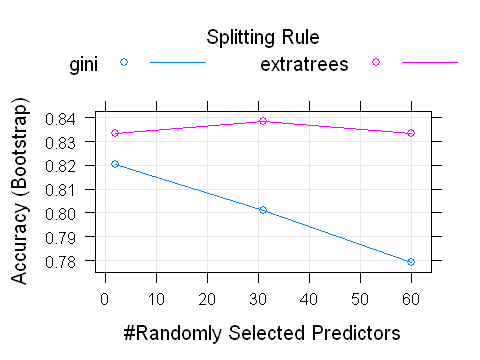

In [26]:
#laod some data
library(caret)
library(mlbench)

data(Sonar)
set.seed(42)

model<-train(Class ~ ., data = Sonar, method = "ranger")
model
plot(model)

#### 3.1.1) Random forests vs. linear models
What's the primary advantage of random forests over linear models?

A random forest is a more flexible model than a linear model, but just as easy to fit, Random forests are very powerful non-linear models, but are also very easy to fit.

#### Fit a random forest
As you saw in the video, random forest models are much more flexible than linear models, and can model complicated nonlinear effects as well as automatically capture interactions between variables. They tend to give very good results on real world data, so let's try one out on the wine quality dataset, where the goal is to predict the human-evaluated quality of a batch of wine, given some of the machine-measured chemical and physical properties of that batch.

Fitting a random forest model is exactly the same as fitting a generalized linear regression model, as you did in the previous chapter. You simply change the `method` argument in the `train` function to be `"ranger"`. The `ranger` package is a rewrite of R's classic `randomForest` package and fits models much faster, but gives almost exactly the same results. We suggest that all beginners use the `ranger` package for random forest modeling.

**Exercise**
1. Train a random forest called model on the wine quality dataset, wine, such that quality is the response variable and all other variables are explanatory variables.
    - Use method = "ranger".
    - Use a tuneLength of 1.
    - Use 5 CV folds.
2. Print model to the console.

*Answer*

In [27]:
# Fit random forest: model
model <- train(
  quality ~ .,
  tuneLength = 1,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)    

+ Fold1: mtry=3, min.node.size=5, splitrule=variance 
- Fold1: mtry=3, min.node.size=5, splitrule=variance 
+ Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry=3, min.node.size=5, splitrule=variance 
- Fold2: mtry=3, min.node.size=5, splitrule=variance 
+ Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold2: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold3: mtry=3, min.node.size=5, splitrule=variance 
- Fold3: mtry=3, min.node.size=5, splitrule=variance 
+ Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold3: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold4: mtry=3, min.node.size=5, splitrule=variance 
- Fold4: mtry=3, min.node.size=5, splitrule=variance 
+ Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
- Fold4: mtry=3, min.node.size=5, splitrule=extratrees 
+ Fold5: mtry=3, min.node.size=5, splitrule=variance 
- Fold5: mtry=3, min.node.size=5, splitrule=variance 
+ Fold5: mtr

### 3.2) (video) Explore a winder model space

One of the big difference between a random forest and linear regression model  we've been exploring up to now is that random forest require "tuning" in other word random forests have `hyperameters` that control how the model is fit unlike `parameters` of a model (for example the split points in the random forest or coefficients in linear regresion, hyperamaters must be selected by hand before fitting the mode.

The most importat of these hyperamaters is the `mtry` or number of randomly selected variables used at each split point in the individual desicion tress that make up the random forest.This number is tunable: you could look as a few as 2 or as many 100 variables per split forest that used 2 variables would tend to be more random forest that used 100 variables  would tend to be less random, unfortunately, due to their nature, it´s hard to know the best value of these hyperameters without trying them out on your trainig data for somedata set 2 variable random foresst  are best and other data set 100 variable random forest are best, one again `caret` save us a lot boring  manually work, automating the process of hyperamaters selection.

To start we can play with the `tuneLenght` argument to the train function this argument is used to tell train to explore more models along its default tuning grid

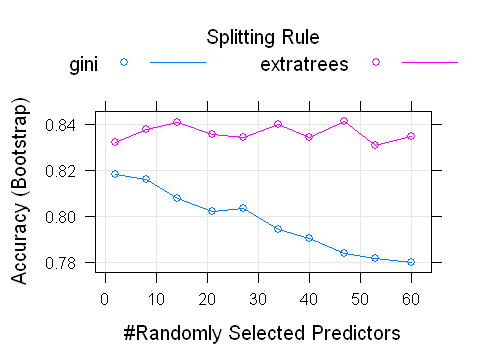

In [28]:
#first we loand the Sonar data from mlbench package 
library(caret)
library(mlbench)
data(Sonar)

#this will take longer than the default model, which uses a tunelenght of 3
model<-train(
    Class ~ .,
    data = Sonar,
    method = "ranger", #this uses the ranger package in R to fit a random forest wich is much faster than the more widely know randomForest package 
    tuneLength = 10
)


#finally we can plot to visually inspect the model´s accurancy for different values of mtry 
plot(model)

#### 3.2.1) Advantage of a longer tune length
What's the advantage of a longer tuneLength?
You explore more potential models and can potentially find a better model.

Note: Number of variables available for splitting at each tree node. In the random forests literature, this is referred to as the mtry parameter. ... randomForest - For classification models, the default is the square root of the number of predictor variables (rounded down). For regression models, it is the number of predictor variables divided by 3 (rounded down).

#### 3.2.2) Try a longer tune length
Recall from the video that random forest models have a primary tuning parameter of `mtry`, which controls how many variables are exposed to the splitting search routine at each split . For example, suppose that a tree has a total of 10 splits and mtry = 2. This means that there are 10 samples of 2 predictors each time a split is evaluated.

Use a larger tuning grid this time, but stick to the defaults provided by the `train()` function. Try a `tuneLength` of 3, rather than 1, to explore some more potential models, and `plot` the resulting model using the plot function.

**Exercise**
- Train a random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables. (This will take a few seconds to run, so be patient!)
- Use method = "ranger".
- Change the tuneLength to 3.
- Use 5 CV folds.
- Print model to the console.
- Plot the model after fitting it.

*Answer*

+ Fold1: mtry= 2, min.node.size=5, splitrule=variance 
- Fold1: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 7, min.node.size=5, splitrule=variance 
- Fold1: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold1: mtry=12, min.node.size=5, splitrule=variance 
- Fold1: mtry=12, min.node.size=5, splitrule=variance 
+ Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
- Fold1: mtry= 7, min.node.size=5, splitrule=extratrees 
+ Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
- Fold1: mtry=12, min.node.size=5, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=5, splitrule=variance 
- Fold2: mtry= 2, min.node.size=5, splitrule=variance 
+ Fold2: mtry= 7, min.node.size=5, splitrule=variance 
- Fold2: mtry= 7, min.node.size=5, splitrule=variance 
+ Fold2: mtry=12, min.node.size=5, splitrule=variance 
- Fold2: mtry=12, min.node.size=5, splitrule=variance

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 79, 80, 80, 80, 81 
Resampling results across tuning parameters:

  mtry  splitrule   RMSE       Rsquared   MAE      
   2    variance    0.6573597  0.3022398  0.5021202
   2    extratrees  0.6852534  0.2378773  0.5096205
   7    variance    0.6543511  0.2848738  0.4983836
   7    extratrees  0.6655256  0.2691106  0.5040878
  12    variance    0.6573930  0.2873497  0.5047146
  12    extratrees  0.6695405  0.2510089  0.5094095

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

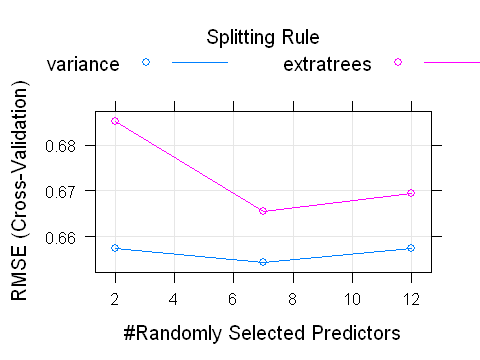

In [29]:
# Fit random forest: model
model <- train(
  quality ~ . ,
  tuneLength = 3,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
model

# Plot model
plot(model)

### 3.3) (video) Custom tuning grids
in the last video we learned how use tuneLength argument to customize caret model, however we´are not limited to the defaults train chooses for us, we can pass our own, fully-customized grid as data frames to the `tuneGrid` argument in `train` function . it give us complete control over the models that are explored during grid search the major drawback of this method is that it requires the most knowledge of the how the model works.

let´s make a custom tuning grid.

In [30]:
#first we loand the Sonar data from mlbench package 
library(caret)
library(mlbench)
data(Sonar)


# first we need to make a dataframe
myGrid<- data.frame(mtry = c(2, 3, 4, 5, 10, 20))

#this example only receives an mtry parameter because the random forest only needs this
set.seed(42)

model<-train(
    Class ~ .,
    data = Sonar,
    method = "ranger", #this uses the ranger package in R to fit a random forest wich is much faster than the more widely know randomForest package 
    tuneGrid = myGrid
)

#plot the model
plot(model)

ERROR: Error: The tuning parameter grid should have columns mtry, splitrule, min.node.size


#### 3.3.1) Advantages of a custom tuning grid
Why use a custom tuneGrid?
It gives you more fine-grained control over the tuning parameters that are explored.

#### 3.3.2) Fit a random forest with custom tuning
Now that you've explored the default tuning grids provided by the `train()` function, let's customize your models a bit more.

You can provide any number of values for `mtry`, from 2 up to the number of columns in the dataset. In practice, there are diminishing returns for much larger values of mtry, so you will use a custom tuning grid that explores 2 simple models (mtry = 2 and mtry = 3) as well as one more complicated model (mtry = 7).

**Exercise**
1. Define a custom tuning grid.
 - Set the number of variables to possibly split at each node, .mtry, to a vector of 2, 3, and 7.
 - Set the rule to split on, .splitrule, to "variance".
 - Set the minimum node size, .min.node.size, to 5.

2. Train another random forest model, model, using the wine dataset on the quality variable with all other variables as explanatory variables.
 - Use method = "ranger".
 - Use the custom tuneGrid.
 - Use 5 CV folds.
 - Print model to the console.
 - Plot the model after fitting it using plot().

*Answer*

+ Fold1: mtry=2, splitrule=variance, min.node.size=5 
- Fold1: mtry=2, splitrule=variance, min.node.size=5 
+ Fold1: mtry=3, splitrule=variance, min.node.size=5 
- Fold1: mtry=3, splitrule=variance, min.node.size=5 
+ Fold1: mtry=7, splitrule=variance, min.node.size=5 
- Fold1: mtry=7, splitrule=variance, min.node.size=5 
+ Fold2: mtry=2, splitrule=variance, min.node.size=5 
- Fold2: mtry=2, splitrule=variance, min.node.size=5 
+ Fold2: mtry=3, splitrule=variance, min.node.size=5 
- Fold2: mtry=3, splitrule=variance, min.node.size=5 
+ Fold2: mtry=7, splitrule=variance, min.node.size=5 
- Fold2: mtry=7, splitrule=variance, min.node.size=5 
+ Fold3: mtry=2, splitrule=variance, min.node.size=5 
- Fold3: mtry=2, splitrule=variance, min.node.size=5 
+ Fold3: mtry=3, splitrule=variance, min.node.size=5 
- Fold3: mtry=3, splitrule=variance, min.node.size=5 
+ Fold3: mtry=7, splitrule=variance, min.node.size=5 
- Fold3: mtry=7, splitrule=variance, min.node.size=5 
+ Fold4: mtry=2, splitrule=v

Random Forest 

100 samples
 12 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 81, 79, 80, 80, 80 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.6466191  0.3362868  0.4788620
  3     0.6412933  0.3376880  0.4730280
  7     0.6337477  0.3427215  0.4692297

Tuning parameter 'splitrule' was held constant at a value of variance

Tuning parameter 'min.node.size' was held constant at a value of 5
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were mtry = 7, splitrule = variance
 and min.node.size = 5.

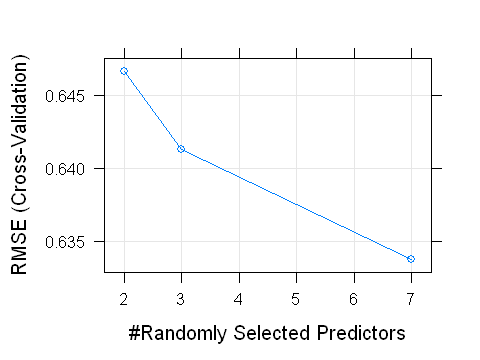

In [31]:
#1 From previous step
tuneGrid <- data.frame(
  .mtry = c(2, 3, 7),
  .splitrule = "variance",
  .min.node.size = 5
)

#2 Fit random forest: model
model <- train(
  quality ~ .,
  tuneGrid = tuneGrid,
  data = wine, 
  method = "ranger",
  trControl = trainControl(
    method = "cv", 
    number = 5, 
    verboseIter = TRUE
  )
)

# Print model to console
model

# Plot model
plot(model)

### 3.4) (video) Introducing glmnet
Now we´ll see one of the best predict models called `glmnet` models are an extension of  generalized linear model (or the `glm` function in R), however, they have built-in variables selection that useful on many real-world datasets in particular, it helps in linear regresion model better handle collinearity (or correlation among predictos in a model) and also help prevent them in being over-condifedent in results derived from smal samples sizes, there are two pimary forms in glmnet models:

- lasso regression,which penalizes the number of number of non-zeros coefficients.
- ridge regression, which penalizes the absolute magnitud of the coefficients (large coefficients).

These penalties are calculated during the model fit, and are used by the optimizer to adjutst the linea regression coefficients in other words a `glmnet` attempts to find a parsimonious model, with either few non-zeros coefficients or small absolute magnitude coefficients, that  best fit the input dataset. this is an extremely useful model, and pairs particulary well with random forests models, as it yield different results.

`glmnet` models are a combination of 2 types of models: lasso regression and ridge regression, this gives `glmnet` models many parameters to tune:

 - the alpha paramter ranges from 0 to , where 0 is pure ridge regression and 1 is pure lasso regression, and any value between is a a mix of the two
 - lambda on the other hand, ranges from 0 to positive infinity, and controls the size of the penalty, higher values of lambda will yield simplier models and high enough values of lambda will yield intercept-only models that just predict the mean of the response variable in the training data.

y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200
class2,0.9148060,0.33423133,0.1365052,0.24492099,0.84829322,0.73592037,0.05391100,0.1651787,0.9899656,...,0.5406514,0.7222597,0.002576062,0.25223405,0.5568160,0.08803946,0.7399642,0.3738620,0.6715633,0.0001012264
class2,0.9370754,0.18843433,0.1771364,0.08763591,0.06274633,0.75178575,0.95509577,0.7277811,0.4384936,...,0.1411782,0.1310911,0.411775569,0.52042257,0.4986688,0.67626884,0.9724303,0.8393751,0.7468173,0.8653565315
class2,0.2861395,0.26971618,0.5195605,0.39110850,0.81984509,0.33261448,0.02560094,0.2061579,0.6999032,...,0.2106741,0.5895710,0.891389510,0.77904746,0.3912340,0.09020876,0.6599458,0.8371015,0.9785843,0.3703812116
class1,0.8304476,0.53074408,0.8111208,0.18256143,0.53936029,0.05754862,0.92076314,0.5864655,0.8890770,...,0.8211162,0.5913061,0.767070756,0.08815411,0.8240591,0.41487972,0.3337511,0.5536796,0.7041028,0.6651317959
class2,0.6417455,0.02145023,0.1153620,0.13362478,0.49902010,0.67441545,0.36666474,0.9135460,0.8341595,...,0.8930576,0.9879969,0.598619170,0.60512811,0.5665962,0.01701286,0.2368524,0.7016140,0.7000800,0.3351982590
class2,0.5190959,0.79876031,0.8934218,0.25746291,0.02222732,0.04157017,0.69839255,0.2069666,0.7344215,...,0.1698084,0.1546299,0.127565006,0.08847341,0.6644925,0.96472272,0.3598008,0.9455406,0.2009973,0.2989820768


Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0.10, lambda=0.01013 
- Fold01: alpha=0.10, lambda=0.01013 
+ Fold01: alpha=0.55, lambda=0.01013 
- Fold01: alpha=0.55, lambda=0.01013 
+ Fold01: alpha=1.00, lambda=0.01013 
- Fold01: alpha=1.00, lambda=0.01013 
+ Fold02: alpha=0.10, lambda=0.01013 
- Fold02: alpha=0.10, lambda=0.01013 
+ Fold02: alpha=0.55, lambda=0.01013 
- Fold02: alpha=0.55, lambda=0.01013 
+ Fold02: alpha=1.00, lambda=0.01013 
- Fold02: alpha=1.00, lambda=0.01013 
+ Fold03: alpha=0.10, lambda=0.01013 
- Fold03: alpha=0.10, lambda=0.01013 
+ Fold03: alpha=0.55, lambda=0.01013 
- Fold03: alpha=0.55, lambda=0.01013 
+ Fold03: alpha=1.00, lambda=0.01013 
- Fold03: alpha=1.00, lambda=0.01013 
+ Fold04: alpha=0.10, lambda=0.01013 
- Fold04: alpha=0.10, lambda=0.01013 
+ Fold04: alpha=0.55, lambda=0.01013 
- Fold04: alpha=0.55, lambda=0.01013 
+ Fold04: alpha=1.00, lambda=0.01013 
- Fold04: alpha=1.00, lambda=0.01013 
+ Fold05: alpha=0.10, lambda=0.01013 
- Fold05: alpha=0.10, lambda=0.01013 
+ Fold05: al

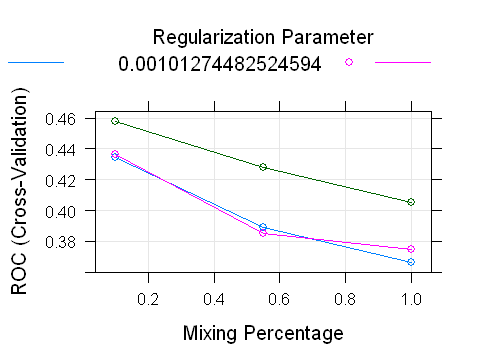

In [32]:
head(overfit)

#make a custome trainControl
myControl<- trainControl(
method = "cv",
    number = 10,
    summaryFunction = twoClassSummary,
    classProbs = TRUE, #super important!
    verboseIter = TRUE
)

# fit a model

set.seed(42)
model <- train (
    y ~ .,
    overfit,
    method = "glmnet",
    trControl = myControl
)

plot(model)

#### 3.4.1) Advantage of glmnet
What's the advantage of glmnet over regular glm models?
models place constraints on your coefficients, which helps prevent overfitting

#### 3.4.2) Make a custom trainControl
The wine quality dataset was a regression problem, but now you are looking at a classification problem. This is a simulated dataset based on the "don't overfit" competition on Kaggle a number of years ago.

Classification problems are a little more complicated than regression problems because you have to provide a custom `summaryFunction` to the `train()` function to use the `AUC` metric to rank your models. Start by making a custom `trainControl`, as you did in the previous chapter. Be sure to set `classProbs = TRUE`, otherwise the `twoClassSummary` for `summaryFunction` will break.

**Exercise**

Make a custom trainControl called myControl for classification using the trainControl function.

- Use 10 CV folds.
- Use twoClassSummary for the summaryFunction.
- Be sure to set classProbs = TRUE.

In [33]:
# Create custom trainControl: myControl
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

#### 3.4.3) Fit glmnet with custom trainControl
Now that you have a custom `trainControl` object, fit a `glmnet` model to the "don't overfit" dataset. Recall from the video that `glmnet` is an extension of the generalized linear regression model (or `glm`) that places constraints on the magnitude of the coefficients to prevent overfitting. This is more commonly known as "penalized" regression modeling and is a very useful technique on datasets with many predictors and few values.

`glmnet` is capable of fitting two different kinds of penalized models, controlled by the alpha parameter:

    Ridge regression (or alpha = 0)
    Lasso regression (or alpha = 1)

You'll now fit a `glmnet` model to the "don't overfit" dataset using the defaults provided by the caret package.

**Exercise**
- Train a `glmnet` model called `model` on the overfit data. Use the custom `trainControl` from the previous exercise (myControl). The variable `y` is the response variable and all other variables are explanatory variables.
- Print the model to the console.
- Use the `max()` function to find the maximum of the ROC statistic contained somewhere in `model[["results"]]`.

In [34]:

# Fit glmnet model: model
model <- train(
  y ~ ., 
  overfit,
  method = "glmnet",
  trControl = myControl
)

# Print model to console
model

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0.10, lambda=0.01013 
- Fold01: alpha=0.10, lambda=0.01013 
+ Fold01: alpha=0.55, lambda=0.01013 
- Fold01: alpha=0.55, lambda=0.01013 
+ Fold01: alpha=1.00, lambda=0.01013 
- Fold01: alpha=1.00, lambda=0.01013 
+ Fold02: alpha=0.10, lambda=0.01013 
- Fold02: alpha=0.10, lambda=0.01013 
+ Fold02: alpha=0.55, lambda=0.01013 
- Fold02: alpha=0.55, lambda=0.01013 
+ Fold02: alpha=1.00, lambda=0.01013 
- Fold02: alpha=1.00, lambda=0.01013 
+ Fold03: alpha=0.10, lambda=0.01013 
- Fold03: alpha=0.10, lambda=0.01013 
+ Fold03: alpha=0.55, lambda=0.01013 
- Fold03: alpha=0.55, lambda=0.01013 
+ Fold03: alpha=1.00, lambda=0.01013 
- Fold03: alpha=1.00, lambda=0.01013 
+ Fold04: alpha=0.10, lambda=0.01013 
- Fold04: alpha=0.10, lambda=0.01013 
+ Fold04: alpha=0.55, lambda=0.01013 
- Fold04: alpha=0.55, lambda=0.01013 
+ Fold04: alpha=1.00, lambda=0.01013 
- Fold04: alpha=1.00, lambda=0.01013 
+ Fold05: alpha=0.10, lambda=0.01013 
- Fold05: alpha=0.10, lambda=0.01013 
+ Fold05: al

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 226, 225, 224, 225, 225, 225, ... 
Resampling results across tuning parameters:

  alpha  lambda        ROC        Sens  Spec     
  0.10   0.0001012745  0.4172101  0.00  0.9742754
  0.10   0.0010127448  0.4299819  0.00  0.9786232
  0.10   0.0101274483  0.4361413  0.00  0.9956522
  0.55   0.0001012745  0.4148551  0.05  0.9445652
  0.55   0.0010127448  0.4191123  0.05  0.9617754
  0.55   0.0101274483  0.4596014  0.00  0.9873188
  1.00   0.0001012745  0.3730072  0.05  0.9315217
  1.00   0.0010127448  0.3663043  0.00  0.9487319
  1.00   0.0101274483  0.4227355  0.00  0.9914855

ROC was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.01012745.

[1] 0.4596014

### 3.5) (video) glmnet with custom tuning grid


Random forest models are relatively easy to tune since has really one parameter important `mtry` glmnet models in other hand have two tuning parameter:
- alpha or the mixed parameter between `lasso` and `ridge` regresion
- lambda or the strength of the penalty on coefficients.

However there is trick to `glmnet` models for a single value at alpha `glmnet` fit all values in lambda simultaneously this is called submodel-trick because we can fit a number differents models simultaneously and explore results each sub-model after the fact.

We can also explore this trick to get faster running great searches while still exploring final great tuning grid.

with `glmnet` models are usually like to explore two values of alpha 0 and 1 with a weight range of lambda, `caret` will use this sub-model trick to colect entire tuning grid down to tune two models fits which run pretty fast even 10 folder of cross validation.

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

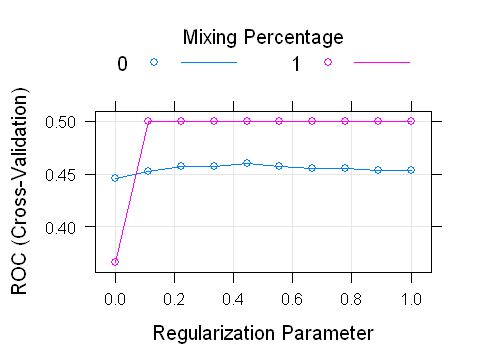

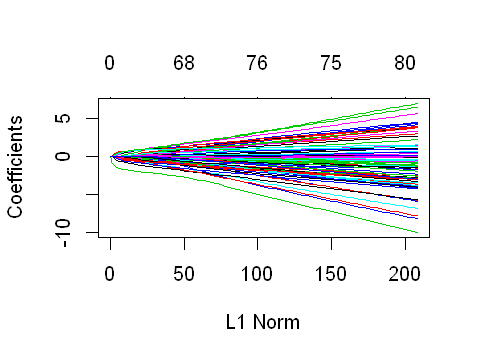

In [35]:
# we start making a custome tuning grid 
myGrid <- expand.grid(
alpha = 0:1,
    lambda = seq(.0001, 1, length = 10)
)

#after that we fit our model

set.seed(42)

model<- train(
y ~ .,
    overfit,
    method = "glmnet",
    tuneGrid = myGrid,
    trControl = myControl
)

plot(model)
plot(model$finalModel)

#### 3.5.1) Exercise
Why use a custom tuning grid for a glmnet model?
With a custom grid you can deeply explore machine learning models in caret.

#### glmnet with custom trainControl and tuning
As you saw in the video, the `glmnet` model actually fits many models at once (one of the great things about the package). You can exploit this by passing a large number of `lambda` values, which control the amount of penalization in the model. `train()` is smart enough to only fit one model per `alpha` value and pass all of the `lambda` values at once for simultaneous fitting.

My favorite tuning grid for `glmnet` models is:

    expand.grid(
      alpha = 0:1,
      lambda = seq(0.0001, 1, length = 100)
    )
    
This grid explores a large number of `lambda` values (100, in fact), from a very small one to a very large one. (You could increase the maximum `lambda` to 10, but in this exercise 1 is a good upper bound.)

If you want to explore fewer models, you can use a shorter lambda sequence. For example, `lambda = seq(0.0001, 1, length = 10)` would fit 10 models per value of alpha.

You also look at the two forms of penalized models with this `tuneGrid`: `ridge` regression and `lasso` regression. `alpha = 0` is pure ridge regression, and `alpha = 1` is pure lasso regression. You can fit a mixture of the two models (i.e. an elastic net) using an alpha between 0 and 1. For example, alpha = 0.05 would be 95% ridge regression and 5% lasso regression.

In this problem you'll just explore the 2 extremes – pure ridge and pure lasso regression – for the purpose of illustrating their differences.

**Exercise**
- Train a `glmnet` model on the `overfit` data such that `y` is the response variable and all other variables are explanatory variables. Make sure to use your custom `trainControl` from the previous exercise (`myControl`). Also, use a custom `tuneGrid` to explore `alpha = 0:1` and 20 values of `lambda` between 0.0001 and 1 per value of alpha.
- Print `model` to the console.
- Print the `max()` of the `ROC` statistic in `model[["results"]]`. You can access it using `model[["results"]][["ROC"]]`.

*Answer*

In [36]:
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)


#Anwears
# Train glmnet with custom trainControl and tuning: model
model <- train(
  y ~ ., 
  overfit,
  tuneGrid = expand.grid(
  alpha = 0:1,
  lambda = seq(.0001, 1, length = 20)
    ),
  method = "glmnet",
  trControl = myControl
)

# Print model to console
model

# Print maximum ROC statistic
max(model[["results"]][["ROC"]])

Warning message in train.default(x, y, weights = w, ...):
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: alpha=0, lambda=1 
- Fold01: alpha=0, lambda=1 
+ Fold01: alpha=1, lambda=1 
- Fold01: alpha=1, lambda=1 
+ Fold02: alpha=0, lambda=1 
- Fold02: alpha=0, lambda=1 
+ Fold02: alpha=1, lambda=1 
- Fold02: alpha=1, lambda=1 
+ Fold03: alpha=0, lambda=1 
- Fold03: alpha=0, lambda=1 
+ Fold03: alpha=1, lambda=1 
- Fold03: alpha=1, lambda=1 
+ Fold04: alpha=0, lambda=1 
- Fold04: alpha=0, lambda=1 
+ Fold04: alpha=1, lambda=1 
- Fold04: alpha=1, lambda=1 
+ Fold05: alpha=0, lambda=1 
- Fold05: alpha=0, lambda=1 
+ Fold05: alpha=1, lambda=1 
- Fold05: alpha=1, lambda=1 
+ Fold06: alpha=0, lambda=1 
- Fold06: alpha=0, lambda=1 
+ Fold06: alpha=1, lambda=1 
- Fold06: alpha=1, lambda=1 
+ Fold07: alpha=0, lambda=1 
- Fold07: alpha=0, lambda=1 
+ Fold07: alpha=1, lambda=1 
- Fold07: alpha=1, lambda=1 
+ Fold08: alpha=0, lambda=1 
- Fold08: alpha=0, lambda=1 
+ Fold08: alpha=1, lambda=1 
- Fold08: alpha=1, lambda=1 
+ Fold09: alpha=0, lambda=1 
- Fold09: alpha=0, lambda=1 
+ Fold09: alph

glmnet 

250 samples
200 predictors
  2 classes: 'class1', 'class2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 225, 226, 225, 225, 226, 225, ... 
Resampling results across tuning parameters:

  alpha  lambda      ROC        Sens  Spec     
  0      0.00010000  0.4199275  0     0.9871377
  0      0.05272632  0.4412138  0     0.9956522
  0      0.10535263  0.4560688  0     1.0000000
  0      0.15797895  0.4580616  0     1.0000000
  0      0.21060526  0.4622283  0     1.0000000
  0      0.26323158  0.4623188  0     1.0000000
  0      0.31585789  0.4666667  0     1.0000000
  0      0.36848421  0.4708333  0     1.0000000
  0      0.42111053  0.4708333  0     1.0000000
  0      0.47373684  0.4751812  0     1.0000000
  0      0.52636316  0.4773551  0     1.0000000
  0      0.57898947  0.4773551  0     1.0000000
  0      0.63161579  0.4794384  0     1.0000000
  0      0.68424211  0.4903080  0     1.0000000
  0      0.73686842  0.4903080  0     1.0000000

[1] 0.5210145

## 4) Preprocessing your data
In this chapter, you will practice using `train()` to preprocess data before fitting models, improving your ability to making accurate predictions.

### 4.1) (video) Median imputation
real world data have missing values this is a problem for most statistical or machine learning algorithm they usually require numbers to work and don´t know what to do with missing data a common approaches is throw out rows with missing values but in generally not a good idea , it can lead to biases in your dataset and generete over-confident models, it can also, in extrame cases lead to you throwing out all of your data, a much better strategy is to use the `median` to guess what a missing value would be, if it weren´t missing  this is very good idea if your data are `missing at random` and lets you model data that include rows with missing values.

so let´s make an example: hear we´ll take our dataset called `mtcars` and we´ll changes some values with `NA` values after that we split our data set and try to fit our model, but unfortunately it´s show us an error, the simple solution to this problem i to pass `medianImpute` the `preProcess` argument for train, which tells caret to impute the missing values in X with their medians.

this way it´s no necessary clean our data or reprocess the information. 


In [37]:
#Generete some data with missing values 
data(mtcars)
set.seed(42)
mtcars2<-mtcars
mtcars2[sample(1:nrow(mtcars2),10),"hp"]<-NA

#split target from predictors 
Y<-mtcars2$mpg
X<-mtcars2[,2:4]

#try to fit a caret model
library(caret)
model<-train(X, Y, preProcess = "medianImpute")
model


note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

32 samples
 3 predictor

Pre-processing: median imputation (3) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 32, 32, 32, 32, 32, 32, ... 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared   MAE     
  2     2.629862  0.8234310  2.200327
  3     2.615883  0.8267228  2.179490

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 3.

#### 4.1.1) Apply median imputation
In this chapter, you'll be using a version of the Wisconsin Breast Cancer dataset. This dataset presents a classic binary classification problem: 50% of the samples are benign, 50% are malignant, and the challenge is to identify which are which.

This dataset is interesting because many of the predictors contain missing values and most rows of the dataset have at least one missing value. This presents a modeling challenge, because most machine learning algorithms cannot handle missing values out of the box. For example, your first instinct might be to fit a logistic regression model to this data, but prior to doing this you need a strategy for handling the NAs.

Fortunately, the `train()` function in `caret` contains an argument called `preProcess`, which allows you to specify that `median imputation` should be used to fill in the missing values. In previous chapters, you created models with the `train()` function using formulas such as `y ~ .`. An alternative way is to specify the `x` and `y` arguments to `train()`, where `x` is an object with samples in rows and features in columns and `y` is a numeric or factor vector containing the outcomes. Said differently, `x` is a matrix or data frame that contains the whole dataset you'd use for the data argument to the `lm()` call, for example, but excludes the response variable column; `y` is a vector that contains just the response variable column.

For this exercise, the argument `x` to `train()` is loaded in your workspace as `breast_cancer_x` and `y` as `breast_cancer_y`.

**Exercise**

- Use the train() function to fit a glm model called median_model to the breast cancer dataset. Use preProcess = "medianImpute" to handle the missing values.
- Print median_model to the console.

*Answer*

In [38]:
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

#avalible in cancer
#breast_cancer_x
#breast_cancer_y


# Apply median imputation: median_model
median_model <- train(
  x = breast_cancer_x, 
  y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print median_model to console
median_model

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 628, 630, 629, 629, 630, ... 
Resampling results:

  ROC        Sens       Spec 
  0.9920564  0.9695169  0.942


### 3.2 (video) KNN imputation
There´are some problems with median imputation, it's very fast but it can produce incorrect results if the input data set has a systematic bias and is missing not-at-random, in other words, if there is  a pattern in data that leads to missing values, median imputation can miss this, it´s therefore useful explore other strategies for missing imputation, particulary for linear models. 

Tree based models such as random forest tend to be more robust to the missing-not-at random case, one useful type of missing values imputation is k-nearst neighbors (KNN impuration) this´s a strategy for imputation missing values based on other "similar" non-missing rows, this is a strategy  for imputation missing value based in other similar no missing row, this method tries to overcome the missing-not-at-random problem by inferring what the missing value would be, based on observations that are similar in other, non-missing variables, fortunately, the train function has a built-in method to do this


In [39]:
# let´s make a data set that has some missing-not-at random data
data(mtcars)
set.seed(42)

mtcars3<-mtcars
# we pretend that smaler cars (those with as lower displacement) don´t report ther horsepower
mtcars3[mtcars3$disp < 140, "hp"]<-NA
Y<-mtcars3$disp
X<-mtcars3[,2:4]

#use median imputation, it would be incorrect because only have information about horesepower of the medium and large cars
#that way if I use a median imputation i will be bias my small cars
model<-train(X, Y, method = "glm", preProcess = "medianImpute")
print(min(model$results$RMSE))

#use KNN imputation
model<-train(X, Y, method = "glm", preProcess = "knnImpute")
print(min(model$results$RMSE))

[1] 6.717277e-15
[1] 6.084156e-14


#### 3.2.1) Question
Will KNN imputation always be better than median imputation? No, you should try both options and keep the one that gives more accurate models.

#### 3.2.2) Use KNN imputation
In the previous exercise, you used `median imputation` to fill in missing values in the `breast cancer` dataset, but that is not the only possible method for dealing with missing data.

An alternative to `median imputation` is `k-nearest neighbors`, or `KNN`, imputation. This is a more advanced form of imputation where missing values are replaced with values from other rows that are similar to the current row. While this is a lot more complicated to implement in practice than simple median imputation, it is very easy to explore in `caret` using the `preProcess` argument to `train()`. You can simply use `preProcess = "knnImpute"` to change the method of imputation used prior to model fitting.

**Exercise**

breast_cancer_x and breast_cancer_y are loaded in your workspace.

- Use the train() function to fit a glm model called knn_model to the breast cancer dataset.
- Use KNN imputation to handle missing values.

*Answer*

In [40]:
# Apply KNN imputation: knn_model
knn_model <- train(
  x = breast_cancer_x, 
  y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "knnImpute"
)

# Print knn_model to console
knn_model

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: nearest neighbor imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 629, 629, 629, ... 
Resampling results:

  ROC        Sens      Spec     
  0.9896606  0.976087  0.9378333


### 3.3 (video) Multiple preprocessing methods
the preprocess argument to train can do a lot more than missing values imputation,it exposes a very wide range of pre-processing steps that can have a large impact on the results of your models. you can also chain together multiple pre-processing steps, for example you can use `median imputation`, then `center` and `scale` your data, then fit a `glm` model this is a common "recipe" for pre-preprocessing data prior to fitting a linear model, note that there is an "orden of operations " to the pre-processing steps (to see more detail you can type `?preProcess`) 


In [41]:
# we load mtcars and type some missing at random data
data(mtcars)
set.seed(42)
mtcars[sample(1:nrow(mtcars),10),"hp"]<-NA
Y<-mtcars$mpg
X<-mtcars[,2:4] #missing at random

# Now let´s use our linear model recipe: median imputation, the center, scale and fit glm
set.seed(42)
model<-train(X, Y,
            method = "glm",
            preProcess = c("medianImpute", "center", "scale")
            )
print(min(model$results$RMSE))

[1] 3.332758


Pre-processing cheat sheet
- start with median imputation
- try KNN imputation if data missing not at random
- for linear model (lm, glm, glmnet) always center and scale.
-it´s worth trying PCA and spatial sign transformation 
-tree-based models such as random forest or GBMs typically don´t need much pre-processing 

#### 3.3.1) Combining preprocessing methods
The `preProcess` argument to `train()` doesn't just limit you to imputing missing values. It also includes a wide variety of other `preProcess` techniques to make your life as a data scientist much easier. You can read a full list of them by typing   `?preProcess` and reading the help page for this function.

One set of preprocessing functions that is particularly useful for fitting regression models is standardization: **centering** and **scaling**. You first **center** by subtracting the mean of each column from each value in that column, then you **scale** by dividing by the standard deviation.

**Standardization** transforms your data such that for each column, the mean is 0 and the standard deviation is 1. This makes it easier for regression models to find a good solution.

**Exercise**
- `breast_cancer_x` and `breast_cancer_y` are loaded in your workspace. Fit a logistic regression model using median imputation called `model` to the breast cancer data, then print it to the console.
- Update the model to include two more pre-processing steps: centering and scaling.

In [42]:
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

#avalible in cancer
#breast_cancer_x
#breast_cancer_y

#1)
# Fit glm with median imputation
model <- train(
  x = breast_cancer_x, 
  y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = "medianImpute"
)

# Print model
model


#2)
# Update model with standardization
model <- train(
  x = breast_cancer_x, 
  y = breast_cancer_y,
  method = "glm",
  trControl = myControl,
  preProcess = c("medianImpute", "center", "scale")
)

# Print updated model
model

Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 629, 628, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9920978  0.9694686  0.9503333


Warning message in train.default(x = breast_cancer_x, y = breast_cancer_y, method = "glm", :
"The metric "Accuracy" was not in the result set. ROC will be used instead."

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set


Generalized Linear Model 

699 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

Pre-processing: median imputation (9), centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 629, 629, 629, 629, 629, 629, ... 
Resampling results:

  ROC        Sens       Spec     
  0.9915775  0.9672947  0.9418333


### 4.4 (video) Handling low-information predictors
in the real word the data that we´are using for predict modelsing is often messy some variables in our dataset might not contain much information for example variables that are constant or very close to constant don´t contain much useful information and it´s can sometimes be useful remove them prior to modeling, nearly constant variables are pariculary tricky, because it easy for one fold of cross-validation to end up with a constant column.

cosntant columns can mess up a lot of models and should be avoided furthermore nearly constant columns cantain little information wich means that these variables tend not to have an impact on the result of your model in general we remove extremly low variance variables from my dataset prior to modeling this speeds up my model and makes the run with fewer bugs and generally doent´s have a large impact on their accurancy.

For example:

In [43]:
# we load mtcars and type some missing at random data
data(mtcars)
set.seed(42)
mtcars[sample(1:nrow(mtcars),10),"hp"]<-NA
Y<-mtcars$mpg
X<-mtcars[,2:4] #missing at random


# add constant-valued columns to mtcars
X$bad<-1


# Now let´s use our linear model recipe: median imputation, the center, scale and fit glm
set.seed(42)
model<-train(X, Y,
            method = "glm",
            preProcess = c("medianImpute", "center", "scale","pca")
            )
#model
#print(min(model$results$RMSE))

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: bad"Warning message:
"model fit failed for Resample01: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constant/zero column to unit variance
"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: bad"Warning message:
"model fit failed for Resample02: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constant/zero column to unit variance
"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: bad"Warning message:
"model fit failed for Resample03: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constan

"Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
"These variables have zero variances: bad"Warning message:
"model fit failed for Resample25: parameter=none Error in prcomp.default(x[, method$pca, drop = FALSE], scale = TRUE, retx = FALSE) : 
  cannot rescale a constant/zero column to unit variance
"Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Something is wrong; all the RMSE metric values are missing:
      RMSE        Rsquared        MAE     
 Min.   : NA   Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA   Max.   : NA  
 NA's   :1     NA's   :1     NA's   :1    


ERROR: Error: Stopping


in the example we add a constant column and try to modeling but unfortunately we obtain an horribly wrong, but it´s hard to tell what, because all of the metrics are missing, this error is due to the constant-valued column, which has a standar deviation of 0 therefore, when we try to scale the column by dividing by stantar deviation we end up with a whole bunch of missing values, which throw off the subsequent stages of modeling .

Fortunately `caret` packges salve us again because we can add `zv` to  preprocesing argument to remove cosntatn-valued columns or `nzv`  to remove nearly constant columns.

we can fix the previous code adding `zv` like:

In [44]:
# we load mtcars and type some missing at random data
data(mtcars)
set.seed(42)
mtcars[sample(1:nrow(mtcars),10),"hp"]<-NA
Y<-mtcars$mpg
X<-mtcars[,2:4] #missing at random


# add constant-valued columns to mtcars
X$bad<-1


# Now let´s use our linear model recipe: median imputation, the center, scale and fit glm
set.seed(42)
model<-train(X, Y,
            method = "glm",
            preProcess = c("zv","medianImpute", "center", "scale","pca")
            )

print(min(model$results$RMSE))

[1] 3.25045


#### 4.4.1)  ,  Low variance variables are unlikely to have a large impact on our models.
What's the best reason to remove near zero variance predictors from your data before building a model?
To reduce model-fitting time without reducing model accuracy, Low variance variables are unlikely to have a large impact on our models.

#### 4.4.2) Remove near zero variance predictors
you'll be using the blood-brain dataset. This is a biochemical dataset in which the task is to predict the following value for a set of biochemical compounds:

    log((concentration of compound in brain) /
          (concentration of compound in blood))
          
This gives a quantitative metric of the compound's ability to cross the blood-brain barrier, and is useful for understanding the biological properties of that barrier.

One interesting aspect of this dataset is that it contains many variables and many of these variables have extemely low variances. This means that there is very little information in these variables because they mostly consist of a single value (e.g. zero).

Fortunately, `caret` contains a utility function called `nearZeroVar()` for removing such variables to save time during modeling.

`nearZeroVar()` takes in data `x`, then looks at the ratio of the most common value to the second most common value, `freqCut`, and the percentage of distinct values out of the number of total samples, `uniqueCut`. By default, `caret` uses `freqCut = 19` and `uniqueCut` = 10, which is fairly conservative. I like to be a little more aggressive and use `freqCut = 2` and `uniqueCut = 20` when calling `nearZeroVar()`.

**Exercise**

bloodbrain_x and bloodbrain_y are loaded in your workspace.

- Identify the near zero variance predictors by running nearZeroVar() on the blood-brain dataset. Store the result as an object called remove_cols. Use freqCut = 2 and uniqueCut = 20 in the call to nearZeroVar().
- Use names() to create a vector containing all column names of bloodbrain_x. Call this all_cols.
- Make a new data frame called bloodbrain_x_small with the near-zero variance variables removed. Use setdiff() to isolate the column names that you wish to keep (i.e. that you don't want to remove.)

In [45]:
myControl <- trainControl(
  method = "cv", 
  number = 10,
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE
)

#avalible in broodbrain
#bloodbrain_x
#bloodbrain_y


# Identify near zero variance predictors: remove_cols
remove_cols <- nearZeroVar(bloodbrain_x, names = TRUE, 
                           freqCut = 2, uniqueCut = 20)

# Get all column names from bloodbrain_x: all_cols
all_cols<-names(bloodbrain_x)

# Remove from data: bloodbrain_x_small
bloodbrain_x_small <- bloodbrain_x[ , setdiff(all_cols, remove_cols)]


#### 4.4.3) preProcess() and nearZeroVar()
Can you use the preProcess argument in caret to remove near-zero variance predictors? Or do you have to do this by hand, prior to modeling, using the nearZeroVar() function? Yes! Set the preProcess argument equal to "nzv"

#### 4.4.4) Fit model on reduced blood-brain data
Now that you've reduced your dataset, you can fit a `glm` model to it using the `train()` function. This model will run faster than using the full dataset and will yield very similar predictive accuracy.

Furthermore, zero variance variables can cause problems with cross-validation (e.g. if one fold ends up with only a single unique value for that variable), so removing them prior to modeling means you are less likely to get errors during the fitting process.

**Exercise**
bloodbrain_x, bloodbrain_y, remove, and bloodbrain_x_small are loaded in your workspace.

- Fit a glm model using the train() function and the reduced blood-brain dataset you created in the previous exercise.
- Print the result to the console.

*Anwear*

In [46]:
# Fit model on reduced data: model
model <- train(
  x = bloodbrain_x_small, 
  y = bloodbrain_y, 
  method = "glm"
)

# Print model to console
model


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient 

Generalized Linear Model 

208 samples
112 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.737597  0.1226598  1.136949


### 4.5 (video) Principle components analysis (PCA)
Principal components analysis (PCA) is one my favorites pre-process steps for linear regression models you'll noticed many that I used it as an many of previous examples. PCA is incredibly useful because it combines all the low-variance and correlated variables in your dataset  into a single set of high-variance, perpendicular predictors . as we saw before, low variance variables can be problematic for cross-validation but can also contain useful information it´s better to find a systematic way to use that information, rather than throw it away, furthermore, perpendicular regresion are useful because they are perfectly uncorrelated.

Linear regression models have trouble with correlation between variables (also know as collinearity) and PCA elegantly removes this issue from the equiation. 

PCA searches for hight-variance linear combinations of the input data that are perpendicular to each other, the first componen of PCA is the highest-variance component, and is the highest variance axis of the orginal dataset, the second PCA component has the second highets variance, and so on.

#### 4.5.1) Using PCA as an alternative to nearZeroVar()
An alternative to removing low-variance predictors is to run PCA on your dataset. This is sometimes preferable because it does not throw out all of your data: many different low variance predictors may end up combined into one high variance PCA variable, which might have a positive impact on your model's accuracy.

This is an especially good trick for linear models: the `pca` option in the `preProcess` argument will center and scale your data, combine low variance variables, and ensure that all of your predictors are orthogonal. This creates an ideal dataset for linear regression modeling, and can often improve the accuracy of your models.

**Exercise**

bloodbrain_x and bloodbrain_y are loaded in your workspace.

- Fit a glm model to the full blood-brain dataset using the "pca" option to preProcess.
- Print the model to the console and inspect the result.

*Answer*

In [47]:
# Fit glm model using PCA: model
model <- train(
  x = bloodbrain_x, 
  y = bloodbrain_y,
  method = "glm", 
  preProcess = ("pca")
)

# Print model to console
model

Generalized Linear Model 

208 samples
132 predictors

Pre-processing: principal component signal extraction (132), centered
 (132), scaled (132) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 208, 208, 208, 208, 208, 208, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6003685  0.4320452  0.4603794


## 5) Selecting models: a case study in churn prediction
in the final chapter of this course, you'll learn how to use resamples() to compare multiple models and select (or ensemble) the best one(s).

### 5.1) (video) Reusing a trainControl
We are working with a more realistic dataset `customer churn` at a telecom company, we'll fit different kind of models and choose the best.

in order to compare apple with apple , we define the training and test folds and make sure each model uses exactly the same split for each folds we can do this by pre-defining a `trainControl` object which explicity specifies which rows are used for model building and which are used as holdouts (this `trainControl` can then be used across multiple models) 

before to start we need load the `customer churn` data from the C50 package in R.

In [48]:
library(caret)
library(C50)

# first we load our data
data(churn)
table(churnTrain$churn)/ nrow(churnTrain) 

#second make train/test index fro cross validation 
set.seed(42)
myFolds<- createFolds(churnTrain$churn, k = 5)

#compare class distribution
i<-myFolds$Fold1
table(churnTrain$churn[i])/ length(i) 

#now we use theese folds to create a trainControl object, which we can re-use to fit multiple models.
myContro<- trainControl(
    summaryFunction = twoClassSummary,
    classProbs = TRUE,
    verboseIter = TRUE,
    savePridictions = TRUE,
    index = myFolds
)

Warning message:
"package 'C50' was built under R version 3.5.3"


      yes        no 
0.1449145 0.8550855 


      yes        no 
0.1441441 0.8558559 

ERROR: Error in trainControl(summaryFunction = twoClassSummary, classProbs = TRUE, : unused argument (savePridictions = TRUE)


#### 5.1.1) Why reuse a trainControl?
- So you can use the same summaryFunction and tuning parameters for multiple models.
- So you don't have to repeat code when fitting multiple models.
- So you can compare models on the exact same training and test data.

#### 5.1.2) Make custom train/test indices
As you saw in the video, for this chapter you will focus on a real-world dataset that brings together all of the concepts discussed in the previous chapters.

The churn dataset contains data on a variety of telecom customers and the modeling challenge is to predict which customers will cancel their service (or churn).

In this chapter, you will be exploring two different types of predictive models: `glmnet` and `rf`, so the first order of business is to create a reusable `trainControl` object you can use to reliably compare them.


**Exercise**

`churn_x` and `churn_y` are loaded in your workspace.

- Use `createFolds()` to create 5 CV folds on `churn_y`, your target variable for this exercise.
- Pass them to `trainControl()` to create a reusable `trainControl` for comparing models.

In [49]:
# Create custom indices: myFolds
myFolds <- createFolds(churn_y, k = 5)

# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

### 5.2) (video) Reintroducing glmnet

recall the `glmnet` model that we learned about early, it's a linear regression model with  build-in variables selection and is a great baseline model for any predictive modeling problem , it is a useful baseline because :
- it's fast
- uses variable selection to ignore noisy variables
-  and also provides linear regresion coeficcients that you can use to understand patters in your data.

It yields models that just as interpetable as models from the `lm` or `glm` function in R. A business analyst could use these coefficients to understand key drivers of churn, but even if you only care about predictions, glment is a solid baseline that fits quickly and often provide very accurate models.

let´s fit one to the churn dataset

In [50]:
set.seed(42)
model_glmnet<-train(
    churn ~ .,
    churnTrain,
    metric = "ROC",
    method = "glmnet",
    tuneGrid = expand.grid(
    alpha = 0:1,
    lambda = 0:10/10),
    trControl = myControl
)

+ Fold1: alpha=0, lambda=1 
- Fold1: alpha=0, lambda=1 
+ Fold1: alpha=1, lambda=1 
- Fold1: alpha=1, lambda=1 
+ Fold2: alpha=0, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0, lambda=1 
+ Fold2: alpha=1, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=1, lambda=1 
+ Fold3: alpha=0, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0, lambda=1 
+ Fold3: alpha=1, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=1, lambda=1 
+ Fold4: alpha=0, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0, lambda=1 
+ Fold4: alpha=1, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=1, lambda=1 
+ Fold5: alpha=0, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0, lambda=1 
+ Fold5: alpha=1, lambda=1 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=1, lambda=1 
Aggregating results
Selecting tuning parameters
Fitting alpha = 0, lambda = 1 on full training set


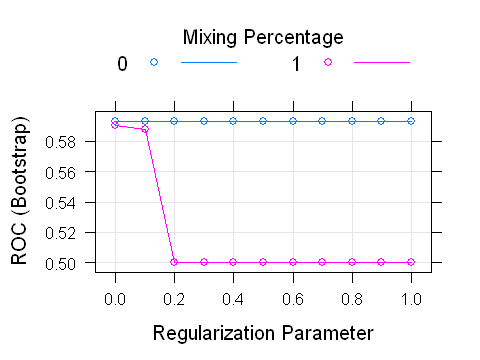

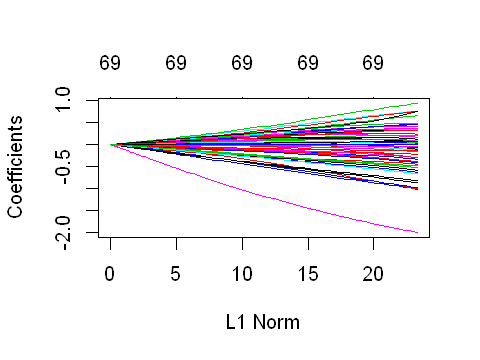

In [51]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

plot(model_glmnet)

plot(model_glmnet$finalModel)

#### 5.2.1) Fit the baseline model
Now that you have a reusable `trainControl` object called `myControl`, you can start fitting different predictive models to your churn dataset and evaluate their predictive accuracy.

You'll start with one of my favorite models, `glmnet`, which penalizes linear and logistic regression models on the size and number of coefficients to help prevent overfitting.

**Exercise**
- Fit a `glmnet` model to the churn dataset called `model_glmnet`. Make sure to use `myControl`, which you created in the first exercise and is available in your workspace, as the `trainControl` object.

*Answer*

In [52]:
# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)

# *Answer*
# Fit glmnet model: model_glmnet
model_glmnet <- train(
  x = churn_x, 
  y = churn_y,
  metric = "ROC",
  method = "glmnet",
  trControl = myControl
)


+ Fold1: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.10, lambda=0.01821 
+ Fold1: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=0.55, lambda=0.01821 
+ Fold1: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold1: alpha=1.00, lambda=0.01821 
+ Fold2: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.10, lambda=0.01821 
+ Fold2: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=0.55, lambda=0.01821 
+ Fold2: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold2: alpha=1.00, lambda=0.01821 
+ Fold3: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.10, lambda=0.01821 
+ Fold3: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=0.55, lambda=0.01821 
+ Fold3: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold3: alpha=1.00, lambda=0.01821 
+ Fold4: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.10, lambda=0.01821 
+ Fold4: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=0.55, lambda=0.01821 
+ Fold4: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold4: alpha=1.00, lambda=0.01821 
+ Fold5: alpha=0.10, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.10, lambda=0.01821 
+ Fold5: alpha=0.55, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=0.55, lambda=0.01821 
+ Fold5: alpha=1.00, lambda=0.01821 


Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"

- Fold5: alpha=1.00, lambda=0.01821 
Aggregating results
Selecting tuning parameters
Fitting alpha = 1, lambda = 0.0182 on full training set


### 5.3) (video) Reintroducing random forest
Next let's try a random forest model on the churn dataset, after 'glmnet', random forest is always the second model that recommended to fit at any predictive model problem.

- it´is slower than 'glmnet' model
- could be less interpetable
- but in a lot of situation can yield much more accurent models with a little parameters tuning.
- Require little pre-processing, not need log tranform or otherwise normalize your predictors,and they handle the missing not at random case pretty well even with median imputation
- they also automatically capture threshold effects and variable interactions by default, both of which occurr often in real-world data.

Now, we´ll see an example, this model is even easier to fit than glmnet, the default caret values for the tuning parameters are great, so we don't need a custum tunning grid. 


+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=35, min.node.size=1, splitrule=gini 
- Fold1: mtry=35, min.node.size=1, splitrule=gini 
+ Fold1: mtry=69, min.node.size=1, splitrule=gini 
- Fold1: mtry=69, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=35, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=35, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=69, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=69, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=35, min.node.size=1, splitrule=gini 
- Fold2: mtry=35, min.node.size=1, splitrule=gini 
+ Fold2: mtry=69, min.node.size=1, splitrule=gini 
- Fold2: mtry=69, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

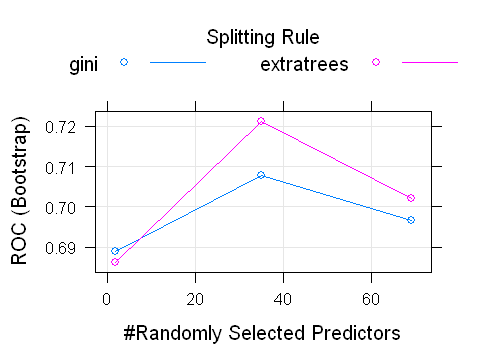

In [53]:
library(caret)
library(C50)

# first we load our data
data(churn)

myFolds <- createFolds(churn_y, k = 5)
# Create reusable trainControl object: myControl
myControl <- trainControl(
  summaryFunction = twoClassSummary,
  classProbs = TRUE, # IMPORTANT!
  verboseIter = TRUE,
  savePredictions = TRUE,
  index = myFolds
)


set.seed(42)
churnTrain$churn<-factor(churnTrain$churn, levels = c("no", "yes"))

model_rf<-train(
churn ~ .,
    churnTrain,
    metric = "ROC",
    method = "ranger",
    trControl  = myControl
    
)

plot(model_rf)

#### 5.3.1) Random forest with custom trainControl
Another one of my favorite models is the random forest, which combines an ensemble of non-linear decision trees into a highly flexible (and usually quite accurate) model.

Rather than using the classic randomForest package, you'll be using the `ranger` package, which is a re-implementation of `randomForest` that produces almost the exact same results, but is faster, more stable, and uses less memory. I highly recommend it as a starting point for random forest modeling in R.

**Exercise**
`churn_x` and `churn_y` are loaded in your workspace.

Fit a random forest model to the `churn` dataset. Be sure to use `myControl` as the trainControl like you've done before and implement the "ranger" method.

*Answer*


In [54]:
# Fit random forest: model_rf
model_rf <- train(
  x = churn_x, 
  y = churn_y,
  metric = "ROC",
  method = "ranger",
  trControl = myControl
)

+ Fold1: mtry= 2, min.node.size=1, splitrule=gini 
- Fold1: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold1: mtry=36, min.node.size=1, splitrule=gini 
- Fold1: mtry=36, min.node.size=1, splitrule=gini 
+ Fold1: mtry=70, min.node.size=1, splitrule=gini 
- Fold1: mtry=70, min.node.size=1, splitrule=gini 
+ Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
- Fold1: mtry= 2, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=36, min.node.size=1, splitrule=extratrees 
+ Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
- Fold1: mtry=70, min.node.size=1, splitrule=extratrees 
+ Fold2: mtry= 2, min.node.size=1, splitrule=gini 
- Fold2: mtry= 2, min.node.size=1, splitrule=gini 
+ Fold2: mtry=36, min.node.size=1, splitrule=gini 
- Fold2: mtry=36, min.node.size=1, splitrule=gini 
+ Fold2: mtry=70, min.node.size=1, splitrule=gini 
- Fold2: mtry=70, min.node.size=1, splitrule=gini 
+ Fold2: mtry= 2, min.node.size=1, splitrule=e

### 5.4) (video) Comparing models
After fitting 2 or more models the next step is deciding which one makes the best prediction on new data, first of all, we have make sure they were fit on exact the same training and test set during cross validation ,so , we're sure making an apples to apples comparasion of their result.

We wanto to pick the model with the highet avarage AUC across all 10 validation folds, but also typically want a model with a low standar diviation in AUC, fortunately the  'caret' package provides handy function for collecting the result from mutiple models, this function is called 'resamples' and it provides a variety of methods for assessing which of two models is the best for a given dataset.


#### 5.4.1) Matching train/test indices
What's the primary reason that train/test indices need to match when comparing two models?
Because otherwise you wouldn't be doing a fair comparison of your models and your results could be due to chance. it's because Train/test indexes allow you to evaluate your models out of sample so you know that they work

#### 5.4.2) Create a resamples object
Now that you have fit two models to the `churn` dataset, it's time to compare their out-of-sample predictions and choose which one is the best model for your dataset.

You can compare models in `caret` using the `resamples()` function, provided they have the same training data and use the same `trainControl` object with preset `cross-validation` folds. `resamples()` takes as input a list of models and can be used to compare dozens of models at once (though in this case you are only comparing two models).

**Exercise**
model_glmnet and model_rf are loaded in your workspace.

- Create a list() containing the glmnet model as item1 and the ranger model as item2.
- Pass this list to the resamples() function and save the resulting object as resamples.
- Summarize the results by calling summary() on resamples.

In [55]:
# Create model_list
model_list <- list(item1 = model_glmnet, item2 = model_rf)

# Pass model_list to resamples(): resamples
resamples<-resamples(model_list)

# Summarize the results
summary(resamples)


Call:
summary.resamples(object = resamples)

Models: item1, item2 
Number of resamples: 5 

ROC 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.3919540 0.5509890 0.6317241 0.5916097 0.6686561 0.7147253    0
item2 0.6073626 0.6883289 0.7134066 0.6968541 0.7370115 0.7381609    0

Sens 
           Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
item1 0.9314286 0.9425287 0.9485714 0.9518621 0.9655172 0.9712644    0
item2 0.9540230 0.9828571 0.9885057 0.9839278 0.9942529 1.0000000    0

Spec 
      Min.    1st Qu. Median       Mean    3rd Qu.      Max. NA's
item1 0.04 0.07692308   0.08 0.15476923 0.19230769 0.3846154    0
item2 0.00 0.00000000   0.04 0.03938462 0.07692308 0.0800000    0


### 5.4) (video) More on resamples
resamples provides a ton a cool methods for comparing models.

- box and box-and-whisker plot of AUC scores like  
        bwplot(resamps, metric = "ROC")
- dotplot show the same information so : 
        dotplot(resamps, metric = "ROC")
- a density plor shows the full distribution of AUC scores using kernel density plot.
        densityplot(resamps, metric = "ROC")
- scatterplot to directly compare the AUC on all 10 cross-validation folds
        xyplot(resamps, metric = "ROC")
- if we had many models, we can still sumarize them using the same functions but recomend you to use 'dotplot'

### 5.4.1) Create a box-and-whisker plot
`caret` provides a variety of methods to use for comparing models. All of these methods are based on the `resamples()` function. My favorite is the *box-and-whisker plot*, which allows you to compare the distribution of predictive accuracy (in this case AUC) for the two models.

In general, you want the model with the higher median AUC, as well as a smaller range between min and max AUC.

You can make this plot using the `bwplot()` function, which makes a box and whisker plot of the model's out of sample scores. Box and whisker plots show the median of each distribution as a line and the interquartile range of each distribution as a box around the median line. You can pass the `metric = "ROC"` argument to the bwplot() function to show a plot of the model's out-of-sample ROC scores and choose the model with the highest median ROC.

If you do not specify a metric to plot, `bwplot()` will automatically plot 3 of them.

**Exercise**
Pass the `resamples` object to the `bwplot()` function to make a box-and-whisker plot. Look at the resulting plot and note which model has the higher median ROC statistic. Be sure to specify which metric you want to plot.

*Answer*

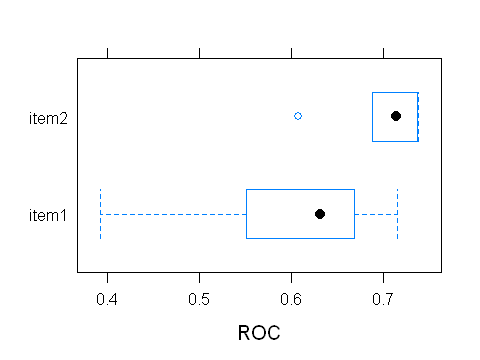

In [56]:
# Create bwplot
bwplot(resamples, metric = "ROC")

### 5.4.2)  Create a scatterplot
Another useful plot for comparing models is the scatterplot, also known as the xy-plot. This plot shows you how similar the two models' performances are on different folds.

It's particularly useful for identifying if one model is consistently better than the other across all folds, or if there are situations when the inferior model produces better predictions on a particular subset of the data.

**Exercise**

Pass the `resamples` object to the `xyplot()` function. Look at the resulting plot and note how similar the two models' predictions are (or are not) on the different folds. Be sure to specify which metric you want to plot.

*Answer*

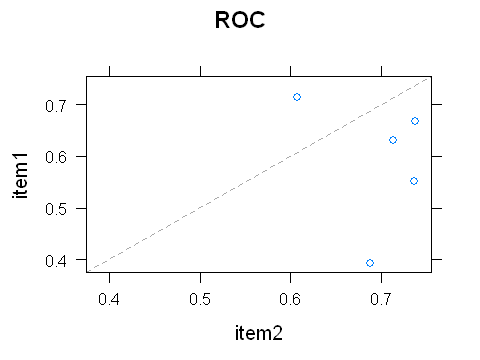

In [57]:
# Create xyplot
xyplot(resamples, metric = "ROC")

### 5.4.3) Ensembling models
That concludes the course! As a teaser for a future course on making ensembles of `caret models`, I'll show you how to fit a stacked ensemble of models using the `caretEnsemble` package.

`caretEnsemble` provides the `caretList()` function for creating multiple `caret` models at once on the same dataset, using the same resampling folds. You can also create your own lists of `caret` models.

In this exercise, I've made a `caretList` for you, containing the `glmnet` and `ranger` models you fit on the churn dataset. Use the `caretStack()` function to make a stack of caret models, with the two sub-models (glmnet and ranger) feeding into another (hopefully more accurate!) caret model.

**Exercise**

- Call the caretStack() function with two arguments, model_list and method = "glm", to ensemble the two models using a logistic regression. Store the result as stack.
- Summarize the resulting model with the summary() function.

*Answer*

In [58]:
# Create ensemble model: stack
stack <- caretStack(model_list, method = "glm")

# Look at summary
summary(stack)

ERROR: Error in caretStack(model_list, method = "glm"): no se pudo encontrar la función "caretStack"


In [ ]:
library(repr)
# Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)

**Exercise**

*Answer*